In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter

In [2]:
h_dddqn = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv")
h_dddqn_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_H_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv")
h_ppo_d = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_PPO_pulse_Discrete.csv")
h_ppo_d_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_H_hamiltonian_Field_agent_PPO_pulse_Discrete.csv")
h_ppo_c = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_PPO_pulse_Continuous.csv")
h_ppo_c_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_H_hamiltonian_Field_agent_PPO_pulse_Continuous.csv")
h_grpo_d = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_GP_pulse_Discrete.csv")
h_grpo_d_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_H_hamiltonian_Field_agent_GP_pulse_Discrete.csv")
h_grpo_c = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_GP_pulse_Continuous.csv")
h_grpo_c_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_H_hamiltonian_Field_agent_GP_pulse_Continuous.csv")                      
h_td3 = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_TD3_pulse_Continuous.csv")
h_td3_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_H_hamiltonian_Field_agent_TD3_pulse_Continuous.csv")

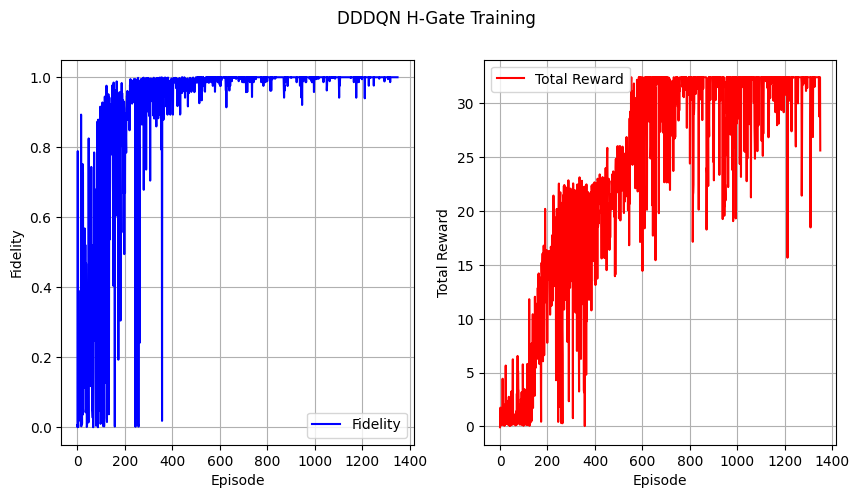

In [3]:
plt.figure(figsize=(10, 5))
plt.suptitle("DDDQN H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_dddqn["episode"], h_dddqn["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_dddqn["episode"], h_dddqn["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig("/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_DDDQN.png", dpi=300)
plt.show()

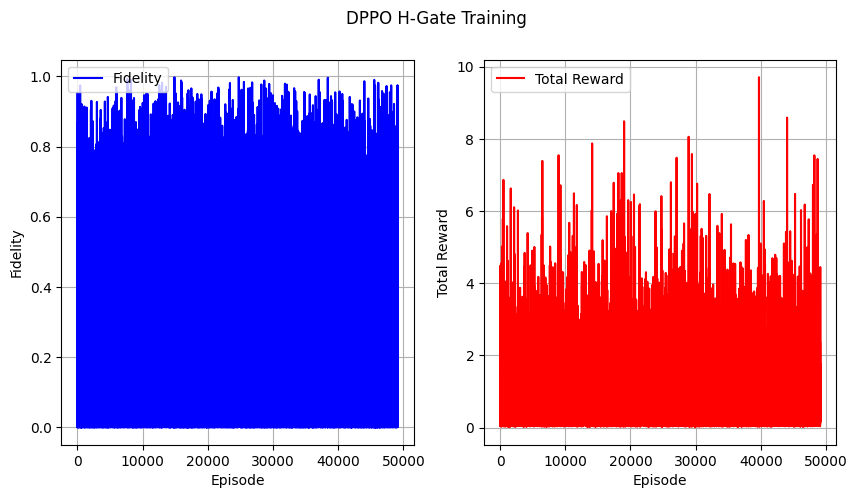

In [4]:
plt.figure(figsize=(10, 5))
plt.suptitle("DPPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_ppo_d["episode"], h_ppo_d["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_ppo_d["episode"], h_ppo_d["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_DPPO.png", dpi=300
)
plt.show()

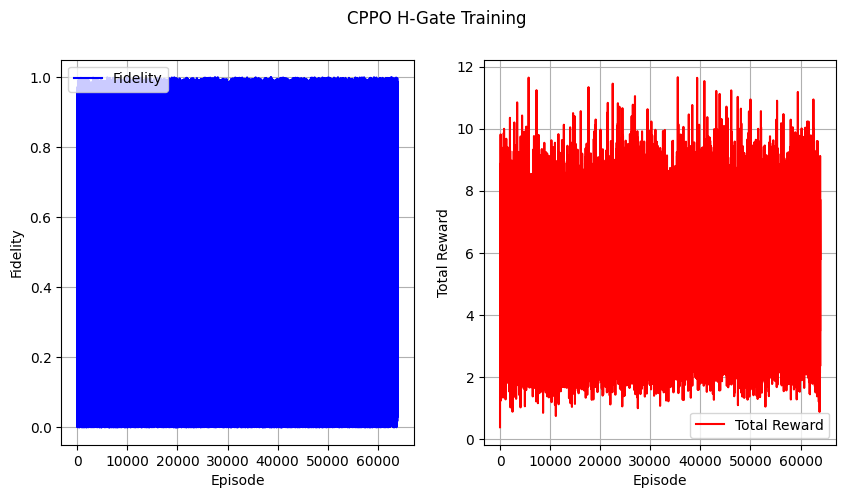

In [5]:
plt.figure(figsize=(10, 5))
plt.suptitle("CPPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_ppo_c["episode"], h_ppo_c["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_ppo_c["episode"], h_ppo_c["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_CPPO.png", dpi=300
)
plt.show()

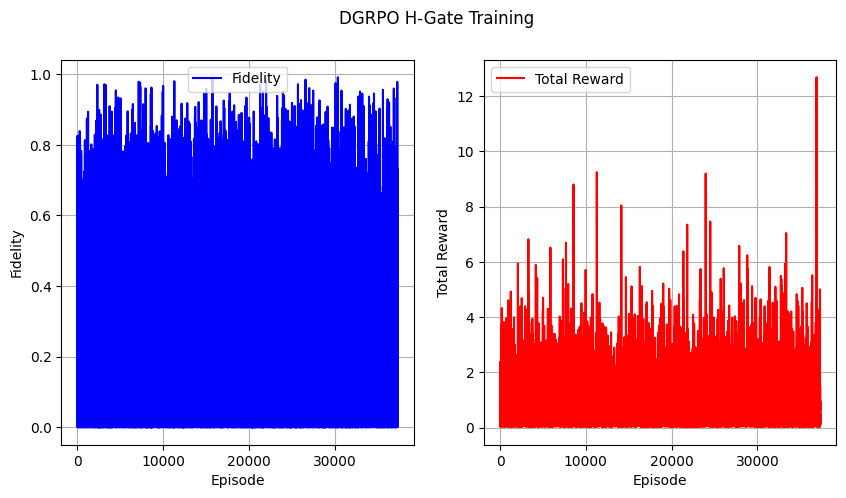

In [6]:
# for GRPO
plt.figure(figsize=(10, 5))
plt.suptitle("DGRPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_grpo_d["episode"], h_grpo_d["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_grpo_d["episode"], h_grpo_d["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")   
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_DGRPO.png", dpi=300
)
plt.show()

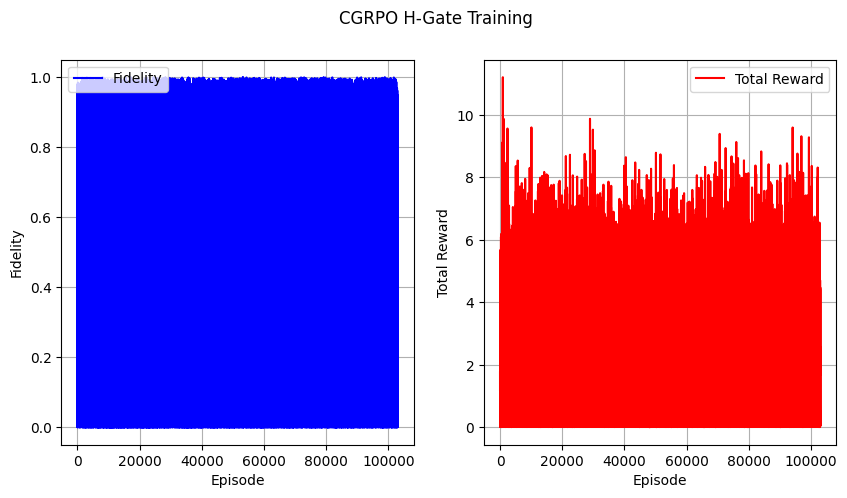

In [7]:
plt.figure(figsize=(10, 5))
plt.suptitle("CGRPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_grpo_c["episode"], h_grpo_c["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_grpo_c["episode"], h_grpo_c["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_CGRPO.png", dpi=300
)
plt.show()

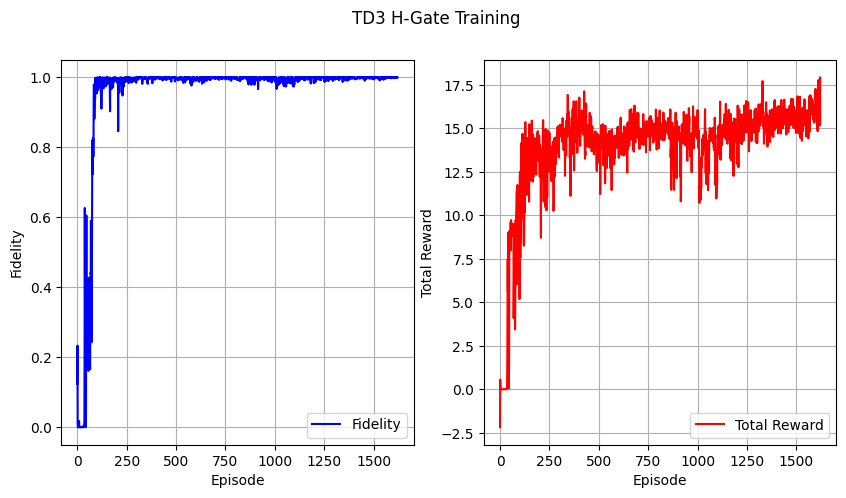

In [8]:
plt.figure(figsize=(10, 5))
plt.suptitle("TD3 H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_td3["episode"], h_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_td3["episode"], h_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()   
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_TD3.png", dpi=300
)
plt.show()

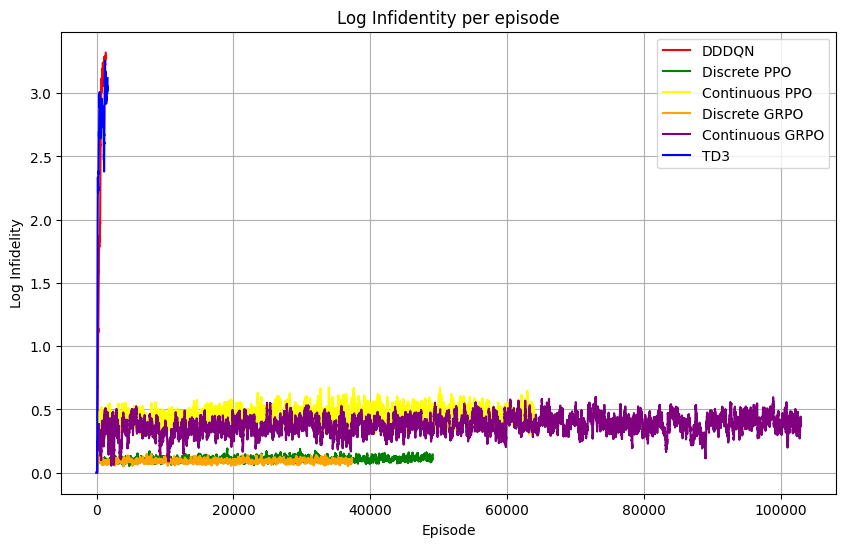

In [9]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
h_dddqn["log_infidelity_100"] = h_dddqn["log_infidelity"].rolling(100).mean()
h_dddqn["log_infidelity_100"] = h_dddqn["log_infidelity_100"].fillna(0)

h_ppo_d["log_infidelity_100"] = h_ppo_d["log_infidelity"].rolling(100).mean()
h_ppo_d["log_infidelity_100"] = h_ppo_d["log_infidelity_100"].fillna(0)

h_ppo_c["log_infidelity_100"] = h_ppo_c["log_infidelity"].rolling(100).mean()
h_ppo_c["log_infidelity_100"] = h_ppo_c["log_infidelity_100"].fillna(0)

h_grpo_d["log_infidelity_100"] = h_grpo_d["log_infidelity"].rolling(100).mean()
h_grpo_d["log_infidelity_100"] = h_grpo_d["log_infidelity_100"].fillna(0)

h_grpo_c["log_infidelity_100"] = h_grpo_c["log_infidelity"].rolling(100).mean()
h_grpo_c["log_infidelity_100"] = h_grpo_c["log_infidelity_100"].fillna(0)

h_td3["log_infidelity_100"] = h_td3["log_infidelity"].rolling(100).mean()
h_td3["log_infidelity_100"] = h_td3["log_infidelity_100"].fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(h_dddqn["episode"], h_dddqn["log_infidelity_100"], label="DDDQN", color="red")
plt.plot(h_ppo_d["episode"], h_ppo_d["log_infidelity_100"], label="Discrete PPO", color="green")
plt.plot(h_ppo_c["episode"], h_ppo_c["log_infidelity_100"], label="Continuous PPO", color="yellow")
plt.plot(h_grpo_d["episode"], h_grpo_d["log_infidelity_100"], label="Discrete GRPO", color="orange")
plt.plot(h_grpo_c["episode"], h_grpo_c["log_infidelity_100"], label="Continuous GRPO", color="purple")
plt.plot(h_td3["episode"], h_td3["log_infidelity_100"], label="TD3", color="blue")
plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("Log Infidentity per episode")
plt.legend()
plt.grid()

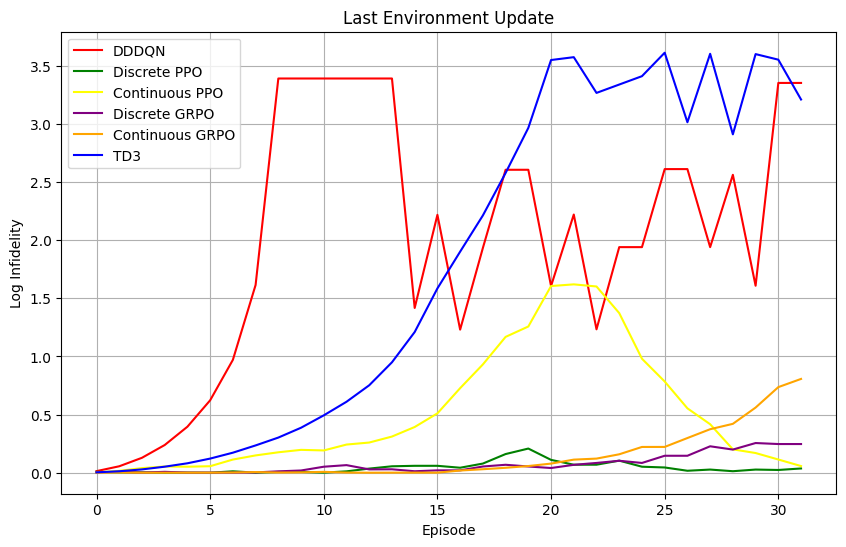

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(h_dddqn_ep["log_infidelity"], label="DDDQN", color="red")
plt.plot(h_ppo_d_ep["log_infidelity"], label="Discrete PPO", color="green")
plt.plot(h_ppo_c_ep["log_infidelity"], label="Continuous PPO", color="yellow")
plt.plot(h_grpo_d_ep["log_infidelity"], label="Discrete GRPO", color="purple")
plt.plot(h_grpo_c_ep["log_infidelity"], label="Continuous GRPO", color="orange")
plt.plot(h_td3_ep["log_infidelity"], label="TD3", color="blue")
plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("Last Environment Update")
plt.legend()
plt.grid()
plt.savefig("/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Log_Infidelity.png", dpi=300)
plt.show()

In [11]:
# Extract the max fidelity, log_infidelity and avg_fidelity of every agent for the H gate nad put them in a dataframe
h_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "PPO-D", "PPO-C", "GRPO-D", "GRPO-C", "TD3"],
        "Max Fidelity": [
            h_dddqn["fidelity"].max(),
            h_ppo_d["fidelity"].max(),
            h_ppo_c["fidelity"].max(),
            h_grpo_d["fidelity"].max(),
            h_grpo_c["fidelity"].max(),
            h_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            h_dddqn["log_infidelity"].max(),
            h_ppo_d["log_infidelity"].max(),
            h_ppo_c["log_infidelity"].max(),
            h_grpo_d["log_infidelity"].max(),
            h_grpo_c["log_infidelity"].max(),
            h_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            h_dddqn["avg_fidelity"].max(),
            h_ppo_d["avg_fidelity"].max(),
            h_ppo_c["avg_fidelity"].max(),
            h_grpo_d["avg_fidelity"].max(),
            h_grpo_c["avg_fidelity"].max(),
            h_td3["avg_fidelity"].max(),
        ],
    }
)
styled_df = h_max.style.background_gradient(
    cmap="inferno", subset=["Max Fidelity", "Max Log Infidelity", "Avg Fidelity"]
)
h_max_sorted = h_max.sort_values(by="Max Log Infidelity", ascending=True)
h_max_sorted.to_latex("/home/pdconte/Desktop/DUTh_Thesis/Tables/H_Gate_Max_Values.tex")
h_max_sorted

Agent  Max Fidelity  Max Log Infidelity  Avg Fidelity
3  GRPO-D      0.991694            2.080622      0.994463
1   PPO-D      0.997610            2.621559      0.998407
0   DDDQN      0.999628            3.429176      0.999752
4  GRPO-C      0.999757            3.614217      0.999838
2   PPO-C      0.999914            4.065397      0.999943
5     TD3      0.999997            5.490279      0.999998

In [12]:
def clean_and_convert(val):
    if isinstance(val, dict):  # If it's already a dictionary, return as is
        return val

    if isinstance(val, str):  # If it's a string, clean and convert it
        try:
            # Replace occurrences of np.float64(x) with just x
            cleaned_val = re.sub(r"np\.float64\(([-+]?[0-9]*\.?[0-9]+)\)", r"\1", val)
            return ast.literal_eval(cleaned_val)  # Convert cleaned string to dictionary
        except (ValueError, SyntaxError):
            return None  # If parsing fails, return None

    return None  # If it's neither a string nor a dictionary, return None

In [13]:
def _normalize_array(array, label):
    max_val = np.max(np.abs(array))
    if max_val == 0:
        return np.zeros_like(array)
    return array / max_val


def _smooth_array(array, method="none", t_normalized=None, **kwargs):
    if method == "moving_average":
        window_size = kwargs.get("window_size", 5)
        return np.convolve(array, np.ones(window_size) / window_size, mode="same")
    elif method == "gaussian":
        sigma = kwargs.get("sigma", 2)
        return gaussian_filter1d(array, sigma=sigma)
    elif method == "savitzky_golay":
        window_length = kwargs.get("window_length", 9)
        polyorder = kwargs.get("polyorder", 3)
        return savgol_filter(array, window_length=window_length, polyorder=polyorder)
    elif method == "cubic_spline" and t_normalized is not None:
        t_smooth = np.linspace(0, 1, 500)
        spline = CubicSpline(t_normalized, array)
        return spline(t_smooth), t_smooth
    return array


# Single-Qubit Plot
def plot_control_pulse(
    rabi,
    detuning,
    gate,
    agent_type,
    smoothing_method="none",
    **kwargs,
):
    # Ensure input arrays are compatible
    assert len(rabi) == len(
        detuning
    ), "Rabi and detuning arrays must have the same length."

    num_steps = len(rabi)
    t_normalized = np.linspace(0, 1, num_steps)

    # Normalize Rabi and Detuning
    rabi_normalized = _normalize_array(rabi, "Rabi")
    detuning_normalized = _normalize_array(detuning, "Detuning")

    # Apply smoothing
    if smoothing_method == "cubic_spline":
        rabi_normalized, t_normalized = _smooth_array(
            rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        detuning_normalized, t_normalized = _smooth_array(
            detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
    else:
        rabi_normalized = _smooth_array(rabi_normalized, smoothing_method, **kwargs)
        detuning_normalized = _smooth_array(
            detuning_normalized, smoothing_method, **kwargs
        )

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(
        t_normalized,
        rabi_normalized,
        label=r"$\frac{\mathrm{\Omega}}{\mathrm{\Omega}_{\mathrm{max}}}$",
        color="blue",
        linestyle="--",
        drawstyle="steps-post",
    )
    plt.plot(
        t_normalized,
        detuning_normalized,
        label=r"$\frac{\Delta}{\Delta_{\mathrm{max}}}$",
        color="red",
        linestyle="--",
        drawstyle="steps-post",
    )
    plt.xlabel(r"$\frac{t}{T}$", fontsize=14)
    plt.ylabel("Normalized Control Pulses", fontsize=14)
    plt.title(f"{agent_type} {gate} Gate Control Pulses", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(
        f"/home/pdconte/Desktop/DUTh_Thesis/Plots/{gate}_Gate_Control_{agent_type}.png", dpi=300
    )
    plt.show()

In [14]:
# Apply the function to the column
h_dddqn_ep["control_pulse_params"] = h_dddqn_ep["control_pulse_params"].apply(
    clean_and_convert
)

h_dddqn_ep["omega"] = h_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
h_dddqn_ep["delta"] = h_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

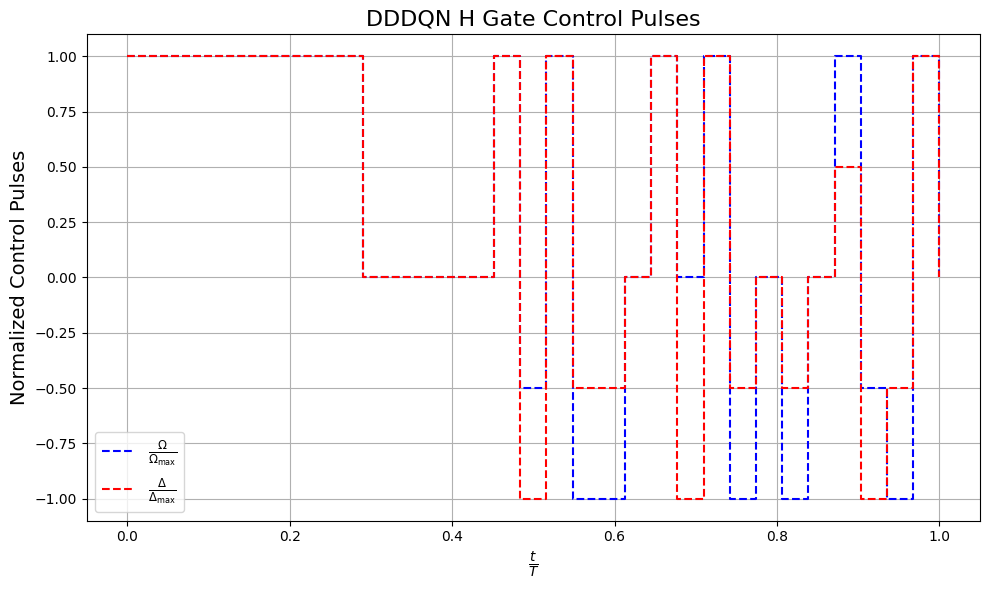

In [15]:
plot_control_pulse(
    h_dddqn_ep["omega"],
    h_dddqn_ep["delta"],
    "H",
    "DDDQN",
    smoothing_method="none",
)

In [16]:
# Apply the function to the column
h_ppo_d_ep["control_pulse_params"] = h_ppo_d_ep["control_pulse_params"].apply(
    clean_and_convert
)

h_ppo_d_ep["omega"] = h_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
h_ppo_d_ep["delta"] = h_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

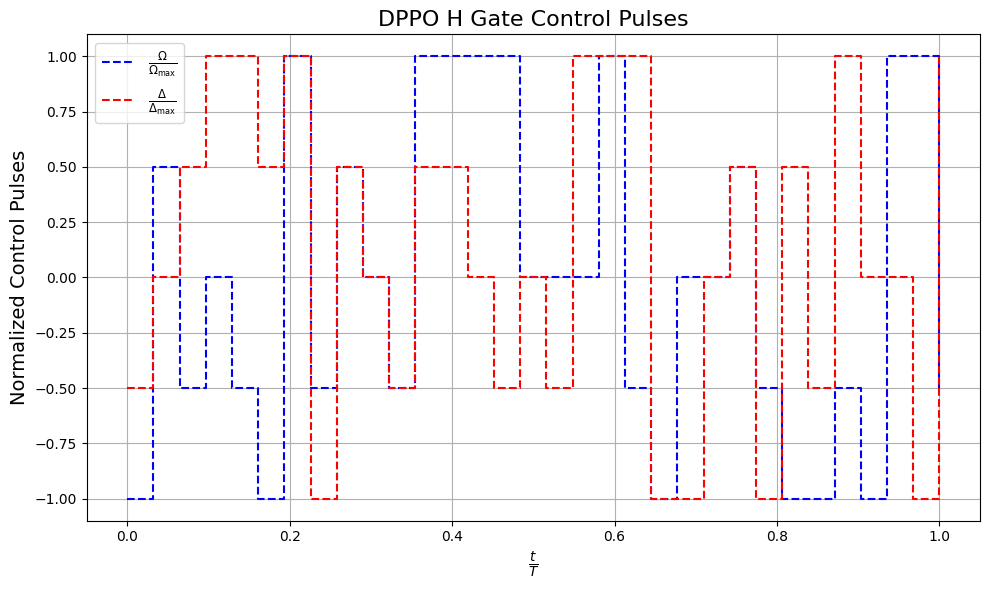

In [17]:
plot_control_pulse(
    h_ppo_d_ep["omega"],
    h_ppo_d_ep["delta"],
    "H",
    "DPPO",
    smoothing_method="none",
)

In [18]:
# Apply the function to the column
h_ppo_c_ep["control_pulse_params"] = h_ppo_c_ep["control_pulse_params"].apply(
    clean_and_convert
)

h_ppo_c_ep["omega"] = h_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
h_ppo_c_ep["delta"] = h_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

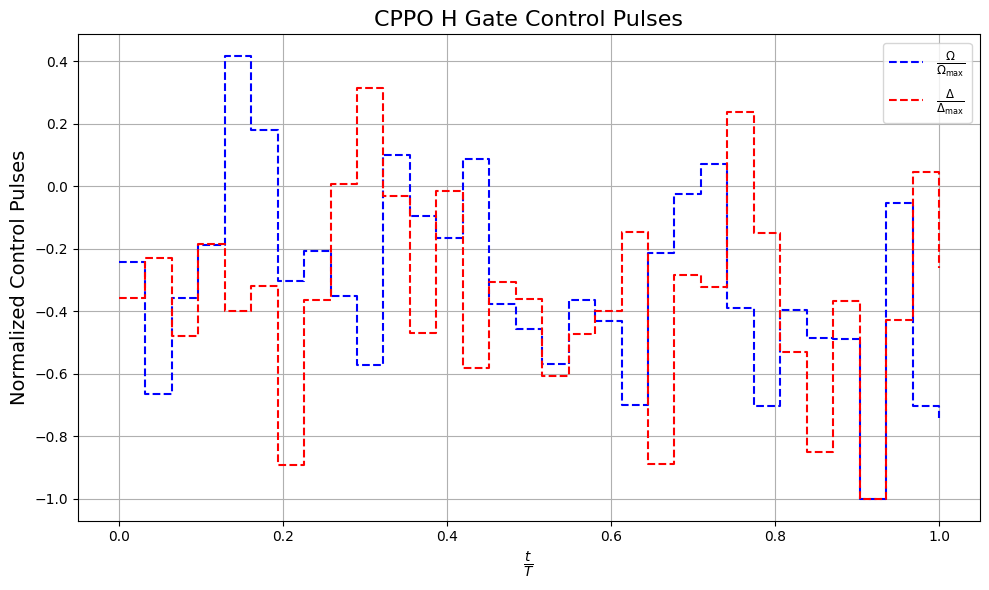

In [19]:
plot_control_pulse(
    h_ppo_c_ep["omega"],
    h_ppo_c_ep["delta"],
    "H",
    "CPPO",
    smoothing_method="none",
)

In [20]:
# Apply the function to the column
h_grpo_d_ep["control_pulse_params"] = h_grpo_d_ep["control_pulse_params"].apply(
    clean_and_convert
)

h_grpo_d_ep["omega"] = h_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
h_grpo_d_ep["delta"] = h_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

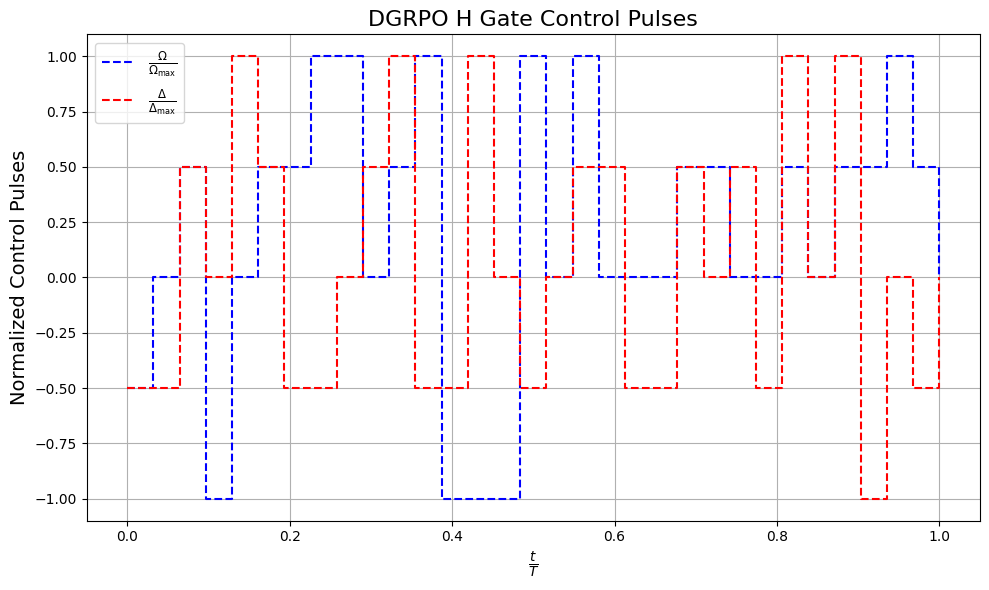

In [21]:
plot_control_pulse(
    h_grpo_d_ep["omega"],
    h_grpo_d_ep["delta"],
    "H",
    "DGRPO",
    smoothing_method="none",
)

In [22]:
# Apply the function to the column
h_grpo_c_ep["control_pulse_params"] = h_grpo_c_ep["control_pulse_params"].apply(
    clean_and_convert
)

h_grpo_c_ep["omega"] = h_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
h_grpo_c_ep["delta"] = h_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

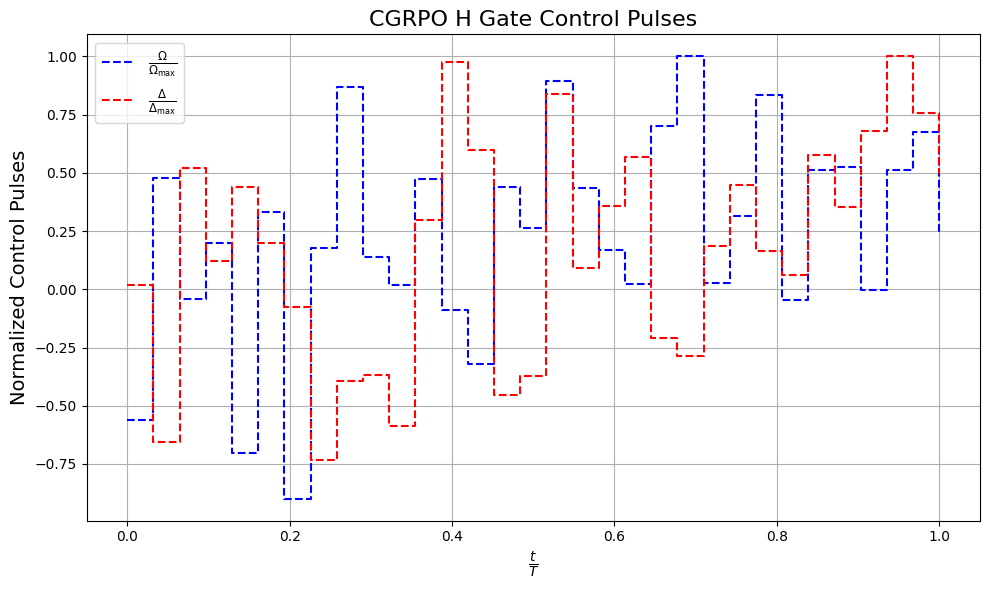

In [23]:
plot_control_pulse(
    h_grpo_c_ep["omega"],
    h_grpo_c_ep["delta"],
    "H",
    "CGRPO",
    smoothing_method="none",
)

In [24]:
h_td3_ep["control_pulse_params"] = h_td3_ep["control_pulse_params"].apply(
    clean_and_convert
)

h_td3_ep["omega"] = h_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
h_td3_ep["delta"] = h_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

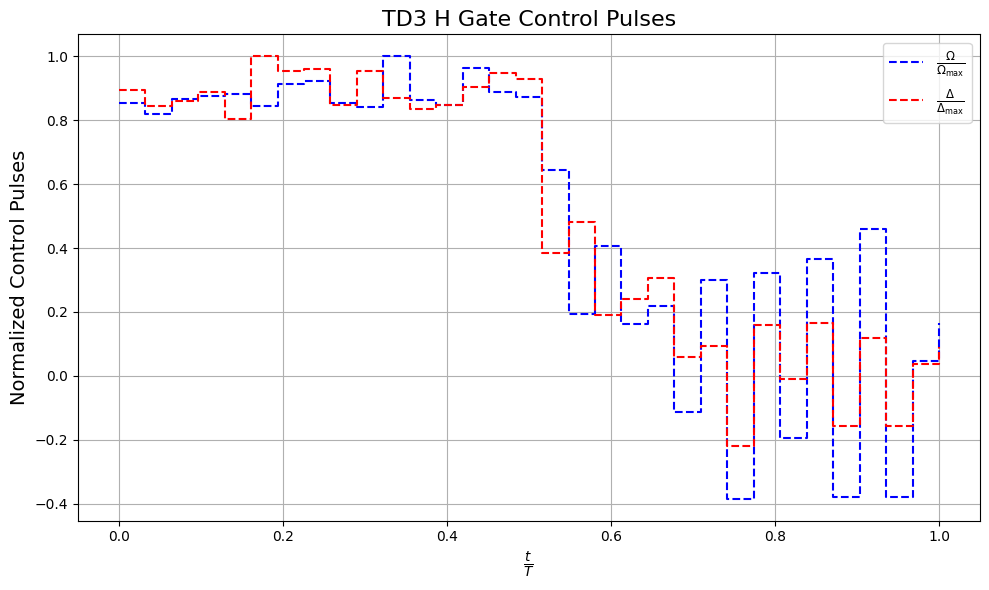

In [25]:
plot_control_pulse(
    h_td3_ep["omega"],
    h_td3_ep["delta"],
    "H",
    "TD3",
    smoothing_method="none",
)

## T-Gate

In [26]:
# import the same for T
t_dddqn = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv")
t_dddqn_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_T_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv")
t_ppo_d = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_PPO_pulse_Discrete.csv")
t_ppo_d_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_T_hamiltonian_Field_agent_PPO_pulse_Discrete.csv")
t_ppo_c = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_PPO_pulse_Continuous.csv")
t_ppo_c_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_T_hamiltonian_Field_agent_PPO_pulse_Continuous.csv")
t_grpo_d = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_GP_pulse_Discrete.csv")
t_grpo_d_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_T_hamiltonian_Field_agent_GP_pulse_Discrete.csv")
t_grpo_c = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_GP_pulse_Continuous.csv")
t_grpo_c_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_T_hamiltonian_Field_agent_GP_pulse_Continuous.csv")
t_td3 = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_TD3_pulse_Continuous.csv")
t_td3_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_T_hamiltonian_Field_agent_TD3_pulse_Continuous.csv")

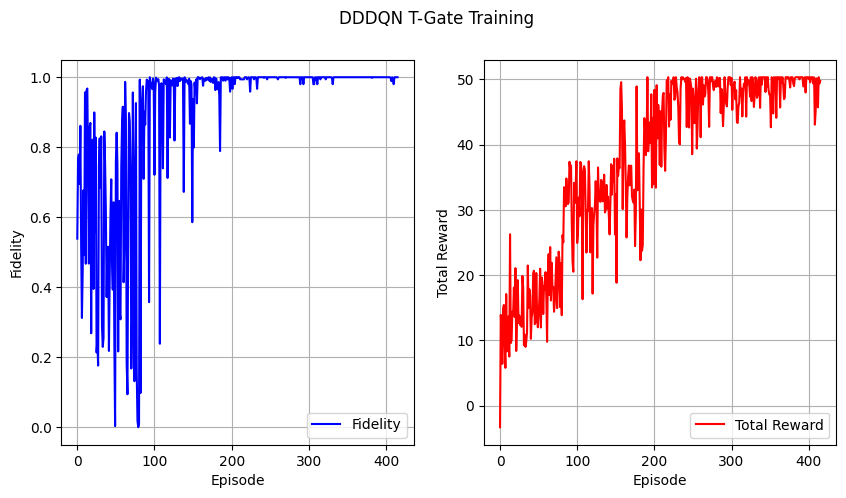

In [27]:
plt.figure(figsize=(10, 5))
plt.suptitle("DDDQN T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_dddqn["episode"], t_dddqn["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_dddqn["episode"], t_dddqn["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_DDDQN.png", dpi=300
)
plt.show()

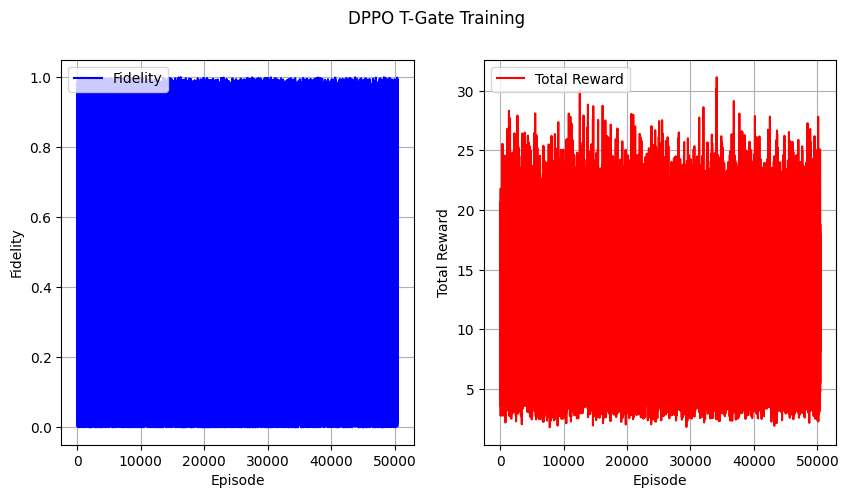

In [28]:
plt.figure(figsize=(10, 5))
plt.suptitle("DPPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_ppo_d["episode"], t_ppo_d["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_ppo_d["episode"], t_ppo_d["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_DPPO.png", dpi=300
)
plt.show()

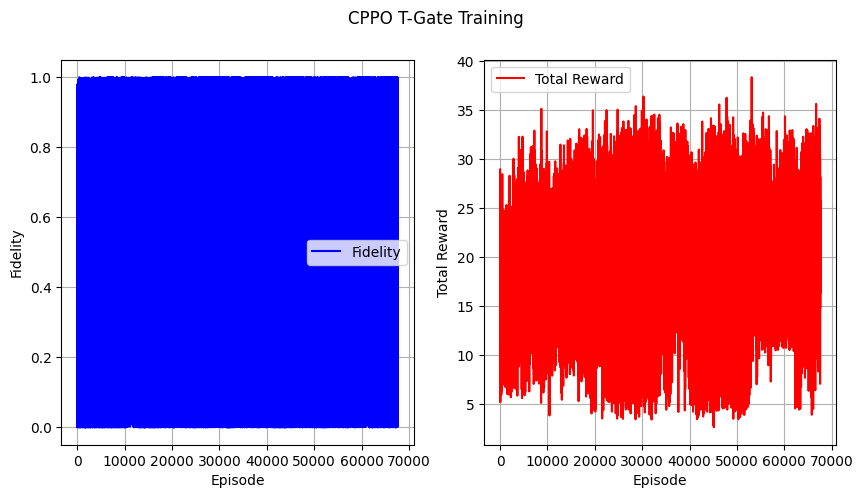

In [29]:
plt.figure(figsize=(10, 5))
plt.suptitle("CPPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_ppo_c["episode"], t_ppo_c["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_ppo_c["episode"], t_ppo_c["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_CPPO.png", dpi=300
)
plt.show()

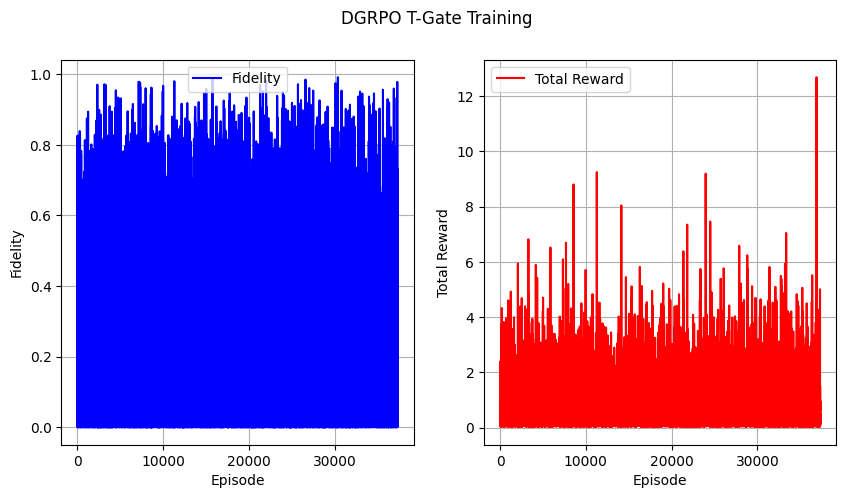

In [30]:
# for GRPO
plt.figure(figsize=(10, 5))
plt.suptitle("DGRPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_grpo_d["episode"], h_grpo_d["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_grpo_d["episode"], h_grpo_d["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")   
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_DGRPO.png", dpi=300
)
plt.show()

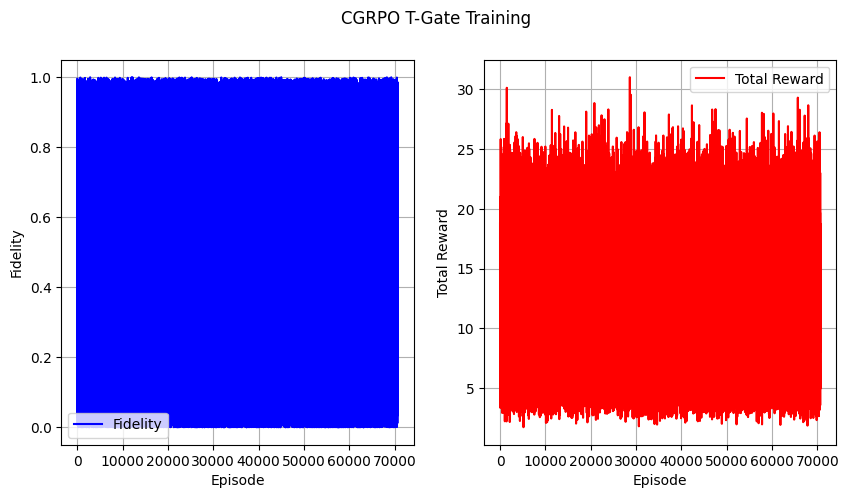

In [31]:
plt.figure(figsize=(10, 5))
plt.suptitle("CGRPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_grpo_d["episode"], t_grpo_d["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_grpo_d["episode"], t_grpo_d["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_CGRPO.png", dpi=300
)
plt.show()

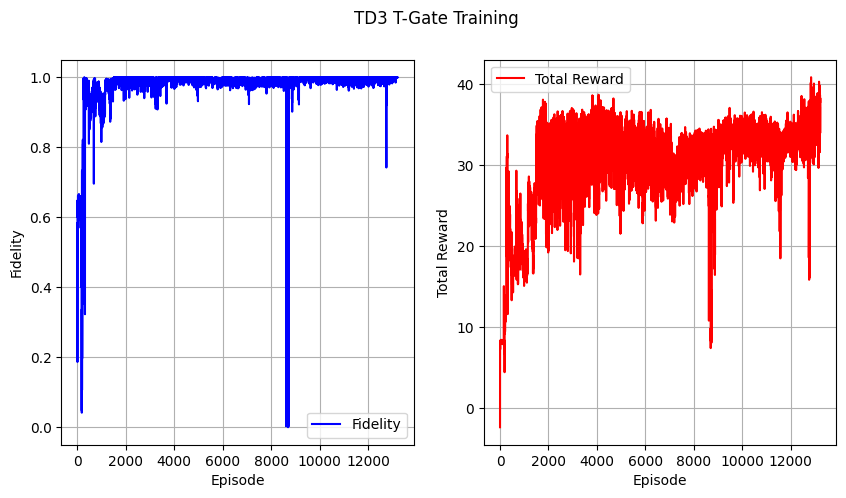

In [32]:
plt.figure(figsize=(10, 5))
plt.suptitle("TD3 T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_td3["episode"], t_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_td3["episode"], t_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()   
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_TD3.png", dpi=300
)
plt.show()

In [33]:
t_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "PPO-D", "PPO-C", "GRPO-D", "GRPO-C", "TD3"],
        "Max Fidelity": [
            t_dddqn["fidelity"].max(),
            t_ppo_d["fidelity"].max(),
            t_ppo_c["fidelity"].max(),
            t_grpo_d["fidelity"].max(),
            t_grpo_c["fidelity"].max(),
            t_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            t_dddqn["log_infidelity"].max(),
            t_ppo_d["log_infidelity"].max(),
            t_ppo_c["log_infidelity"].max(),
            t_grpo_d["log_infidelity"].max(),
            t_grpo_c["log_infidelity"].max(),
            t_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            t_dddqn["avg_fidelity"].max(),
            t_ppo_d["avg_fidelity"].max(),
            t_ppo_c["avg_fidelity"].max(),
            t_grpo_d["avg_fidelity"].max(),
            t_grpo_c["avg_fidelity"].max(),
            t_td3["avg_fidelity"].max(),
        ],
    }
)
t_max_sorted = t_max.sort_values(by="Max Log Infidelity", ascending=True)
t_max_sorted.to_latex("/home/pdconte/Desktop/DUTh_Thesis/Tables/T_Gate_Max_Values.tex")
t_max_sorted

Agent  Max Fidelity  Max Log Infidelity  Avg Fidelity
0   DDDQN      0.999687            3.504144      0.999791
5     TD3      0.999755            3.611604      0.999837
3  GRPO-D      0.999766            3.630432      0.999844
4  GRPO-C      0.999812            3.724867      0.999874
1   PPO-D      0.999967            4.475026      0.999978
2   PPO-C      0.999990            5.017896      0.999994

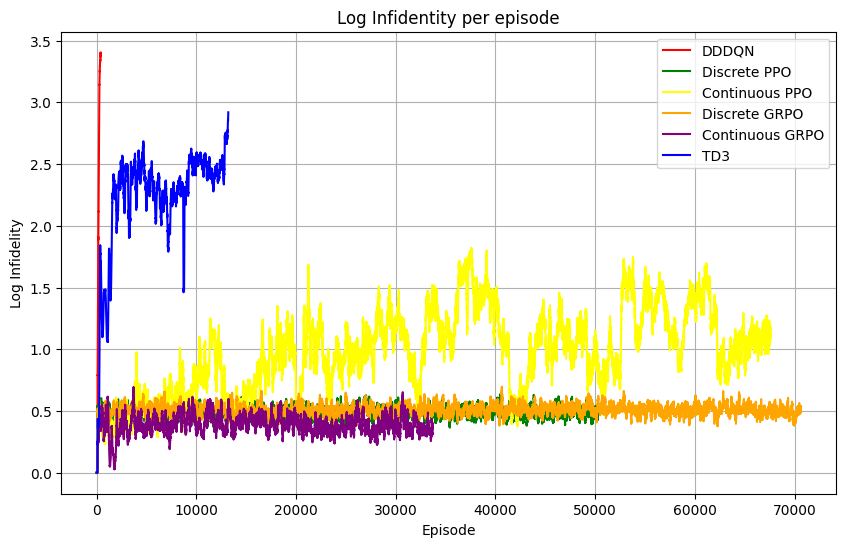

In [34]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
t_dddqn["log_infidelity_100"] = t_dddqn["log_infidelity"].rolling(100).mean()
t_dddqn["log_infidelity_100"] = t_dddqn["log_infidelity_100"].fillna(0)

t_ppo_d["log_infidelity_100"] = t_ppo_d["log_infidelity"].rolling(100).mean()
t_ppo_d["log_infidelity_100"] = t_ppo_d["log_infidelity_100"].fillna(0)

t_ppo_c["log_infidelity_100"] = t_ppo_c["log_infidelity"].rolling(100).mean()
t_ppo_c["log_infidelity_100"] = t_ppo_c["log_infidelity_100"].fillna(0)

t_grpo_d["log_infidelity_100"] = t_grpo_d["log_infidelity"].rolling(100).mean()
t_grpo_d["log_infidelity_100"] = t_grpo_d["log_infidelity_100"].fillna(0)

t_grpo_c["log_infidelity_100"] = t_grpo_c["log_infidelity"].rolling(100).mean()
t_grpo_c["log_infidelity_100"] = t_grpo_c["log_infidelity_100"].fillna(0)

t_td3["log_infidelity_100"] = t_td3["log_infidelity"].rolling(100).mean()
t_td3["log_infidelity_100"] = t_td3["log_infidelity_100"].fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(t_dddqn["episode"], t_dddqn["log_infidelity_100"], label="DDDQN", color="red")
plt.plot(t_ppo_d["episode"], t_ppo_d["log_infidelity_100"], label="Discrete PPO", color="GREEN")
plt.plot(t_ppo_c["episode"], t_ppo_c["log_infidelity_100"], label="Continuous PPO", color="YELLOW")
plt.plot(t_grpo_d["episode"], t_grpo_d["log_infidelity_100"], label="Discrete GRPO", color="ORANGE")
plt.plot(t_grpo_c["episode"], t_grpo_c["log_infidelity_100"], label="Continuous GRPO", color="PURPLE")
plt.plot(t_td3["episode"], t_td3["log_infidelity_100"], label="TD3", color="blue")

plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("Log Infidentity per episode")
plt.legend()
plt.grid()

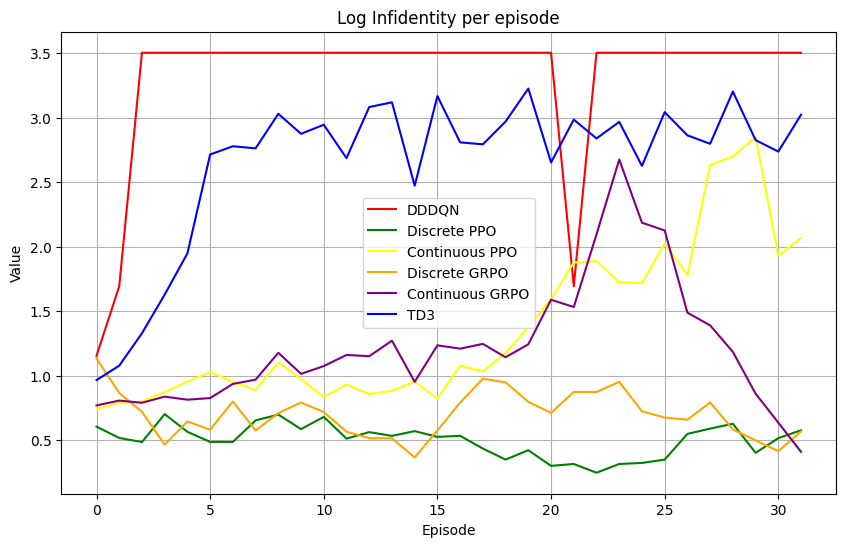

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(t_dddqn_ep["log_infidelity"], label="DDDQN", color="red")
plt.plot(t_ppo_d_ep["log_infidelity"], label="Discrete PPO", color="green")
plt.plot(t_ppo_c_ep["log_infidelity"], label="Continuous PPO", color="yellow")
plt.plot(t_grpo_d_ep["log_infidelity"], label="Discrete GRPO", color="orange")
plt.plot(t_grpo_c_ep["log_infidelity"], label="Continuous GRPO", color="purple")
plt.plot(t_td3_ep["log_infidelity"], label="TD3", color="blue")
plt.xlabel("Episode")
plt.ylabel("Value")
plt.title("Log Infidentity per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Log_Infidelity.png", dpi=300
)
plt.show()

In [36]:
# Apply the function to the column
t_dddqn_ep["control_pulse_params"] = t_dddqn_ep["control_pulse_params"].apply(
    clean_and_convert
)

t_dddqn_ep["omega"] = t_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
t_dddqn_ep["delta"] = t_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

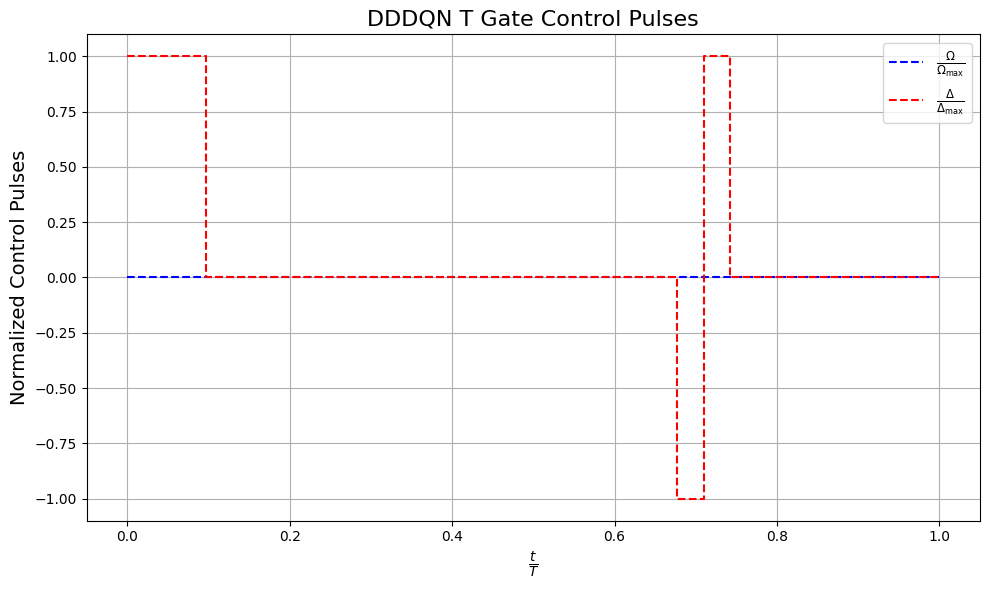

In [37]:
plot_control_pulse(
    t_dddqn_ep["omega"],
    t_dddqn_ep["delta"],
    "T",
    "DDDQN",
    smoothing_method="none",
)

In [38]:
# Apply the function to the column
t_ppo_d_ep["control_pulse_params"] = t_ppo_d_ep["control_pulse_params"].apply(
    clean_and_convert
)

t_ppo_d_ep["omega"] = t_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
t_ppo_d_ep["delta"] = t_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

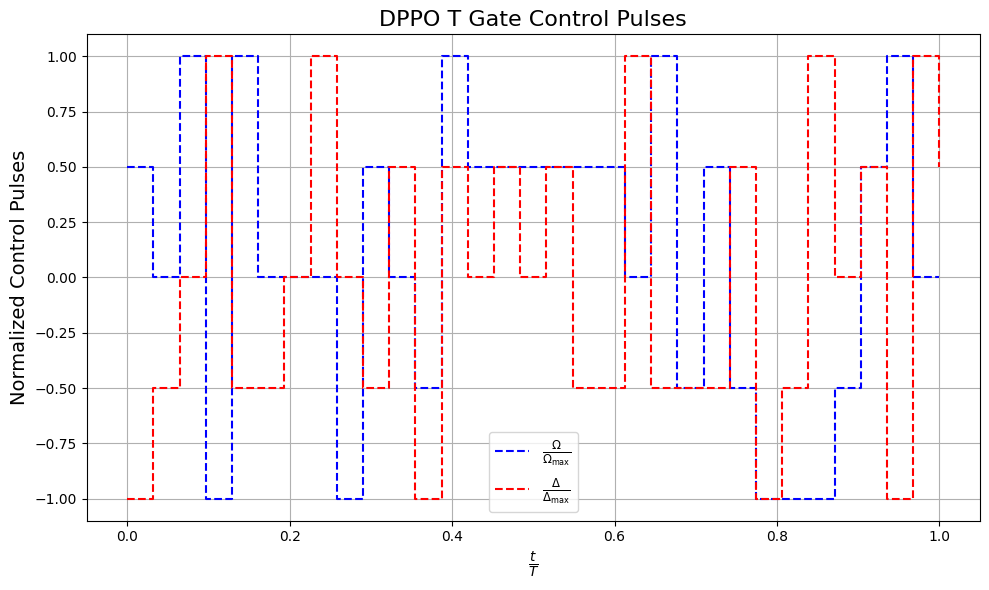

In [39]:
plot_control_pulse(
    t_ppo_d_ep["omega"],
    t_ppo_d_ep["delta"],
    "T",
    "DPPO",
    smoothing_method="none",
)

In [40]:
# Apply the function to the column
t_ppo_c_ep["control_pulse_params"] = t_ppo_c_ep["control_pulse_params"].apply(
    clean_and_convert
)

t_ppo_c_ep["omega"] = t_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
t_ppo_c_ep["delta"] = t_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

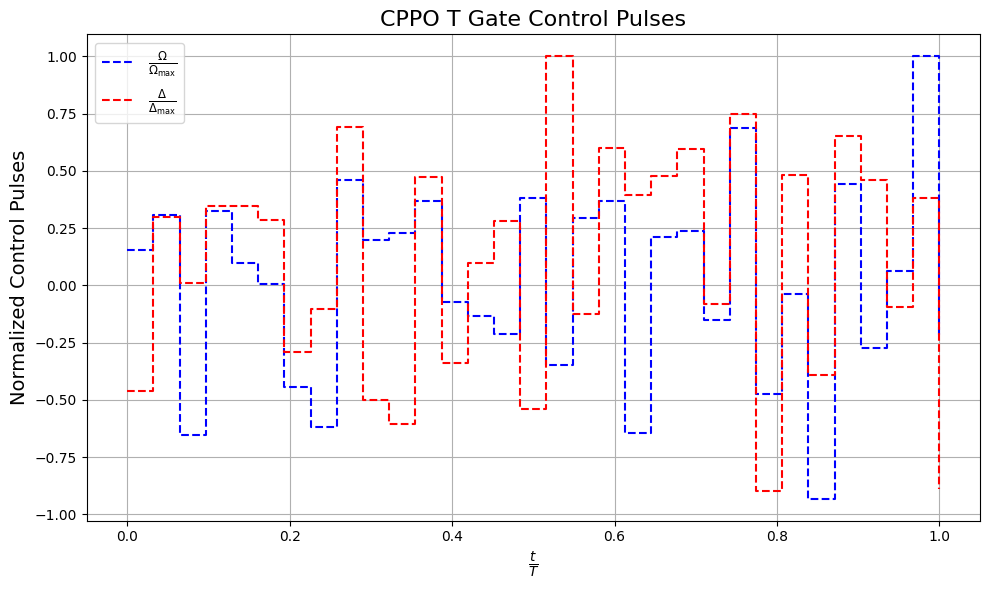

In [41]:
plot_control_pulse(
    t_ppo_c_ep["omega"],
    t_ppo_c_ep["delta"],
    "T",
    "CPPO",
    smoothing_method="none",
)

In [42]:
# Apply the function to the column
t_grpo_d_ep["control_pulse_params"] = t_grpo_d_ep["control_pulse_params"].apply(
    clean_and_convert
)

t_grpo_d_ep["omega"] = t_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
t_grpo_d_ep["delta"] = t_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

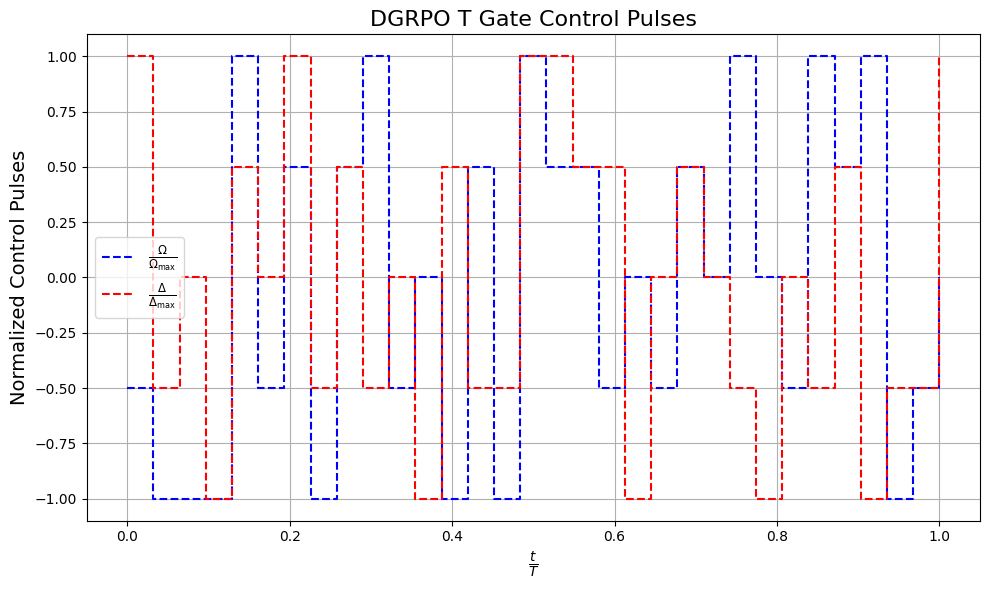

In [43]:
plot_control_pulse(
    t_grpo_d_ep["omega"],
    t_grpo_d_ep["delta"],
    "T",
    "DGRPO",
    smoothing_method="none",
)

In [44]:
# Apply the function to the column
t_grpo_c_ep["control_pulse_params"] = t_grpo_c_ep["control_pulse_params"].apply(
    clean_and_convert
)

t_grpo_c_ep["omega"] = t_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
t_grpo_c_ep["delta"] = t_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

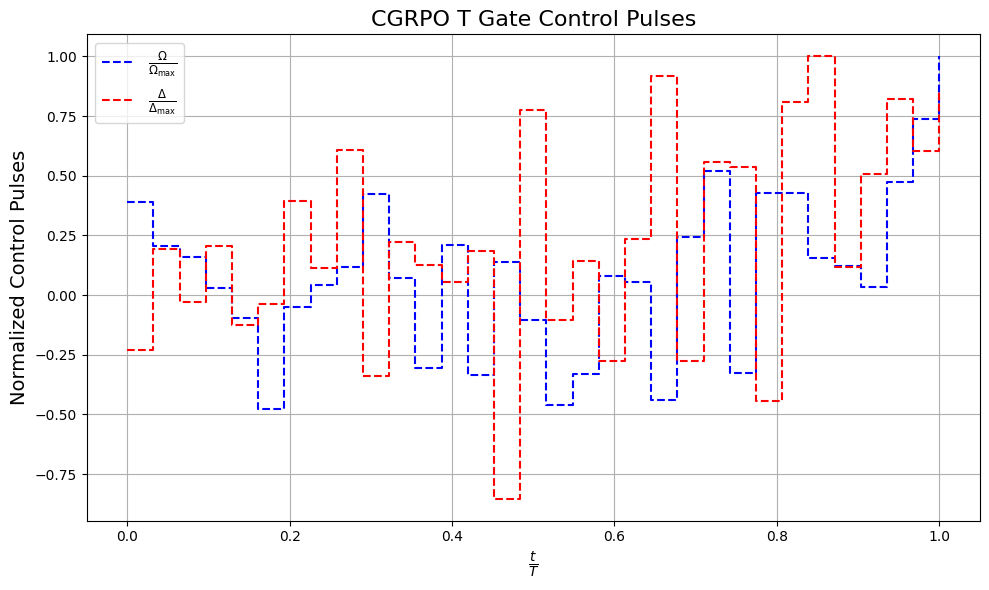

In [45]:
plot_control_pulse(
    t_grpo_c_ep["omega"],
    t_grpo_c_ep["delta"],
    "T",
    "CGRPO",
    smoothing_method="none",
)

In [46]:
t_td3_ep["control_pulse_params"] = t_td3_ep["control_pulse_params"].apply(
    clean_and_convert
)

t_td3_ep["omega"] = t_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("omega") if isinstance(x, dict) else None
)
t_td3_ep["delta"] = t_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("delta") if isinstance(x, dict) else None
)

In [47]:
plot_control_pulse(
    t_td3_ep["omega"],
    t_td3_ep["delta"],
    "T",
    "TD3",
    smoothing_method="none",
)

In [48]:
cnot_dddqn = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv")
cnot_dddqn_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_CNOT_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv")
cnot_ppo_d = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Discrete.csv")
cnot_ppo_d_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Discrete.csv")
cnot_ppo_c = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Continuous.csv")
cnot_ppo_c_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Continuous.csv")
cnot_grpo_d = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Discrete.csv")
cnot_grpo_d_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Discrete.csv")
cnot_grpo_c = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Continuous.csv")
cnot_grpo_c_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Continuous.csv")
cnot_td3 = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_TD3_pulse_Continuous.csv")
cnot_td3_ep = pd.read_csv("/home/pdconte/Desktop/DUTh_Thesis/Data/last_env_update_gate_CNOT_hamiltonian_Field_agent_TD3_pulse_Continuous.csv")

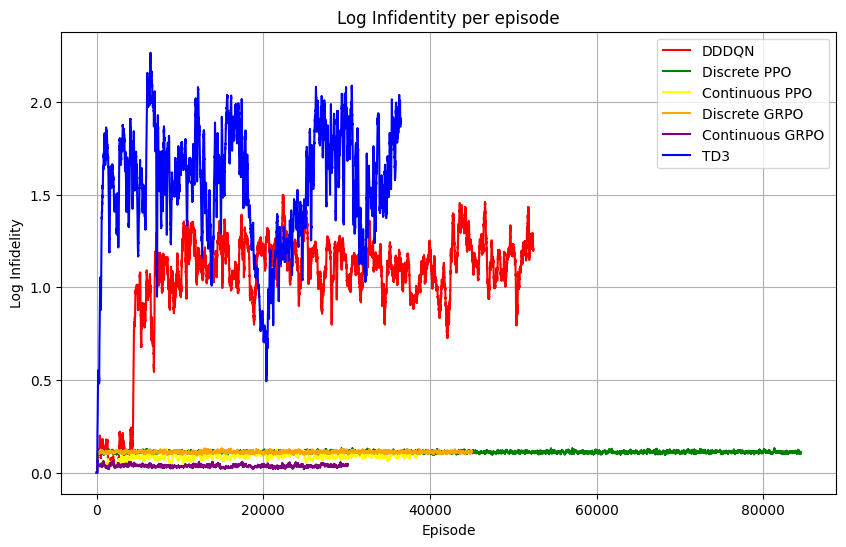

In [49]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
cnot_dddqn["log_infidelity_100"] = cnot_dddqn["log_infidelity"].rolling(100).mean()
cnot_dddqn["log_infidelity_100"] = cnot_dddqn["log_infidelity_100"].fillna(0)

cnot_ppo_d["log_infidelity_100"] = cnot_ppo_d["log_infidelity"].rolling(100).mean()
cnot_ppo_d["log_infidelity_100"] = cnot_ppo_d["log_infidelity_100"].fillna(0)

cnot_ppo_c["log_infidelity_100"] = cnot_ppo_c["log_infidelity"].rolling(100).mean()
cnot_ppo_c["log_infidelity_100"] = cnot_ppo_c["log_infidelity_100"].fillna(0)

cnot_grpo_d["log_infidelity_100"] = cnot_grpo_d["log_infidelity"].rolling(100).mean()
cnot_grpo_d["log_infidelity_100"] = cnot_grpo_d["log_infidelity_100"].fillna(0)

cnot_grpo_c["log_infidelity_100"] = cnot_grpo_c["log_infidelity"].rolling(100).mean()
cnot_grpo_c["log_infidelity_100"] = cnot_grpo_c["log_infidelity_100"].fillna(0)

cnot_td3["log_infidelity_100"] = cnot_td3["log_infidelity"].rolling(100).mean()
cnot_td3["log_infidelity_100"] = cnot_td3["log_infidelity_100"].fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(cnot_dddqn["episode"], cnot_dddqn["log_infidelity_100"], label="DDDQN", color="red")
plt.plot(cnot_ppo_d["episode"], cnot_ppo_d["log_infidelity_100"], label="Discrete PPO", color="GREEN")
plt.plot(cnot_ppo_c["episode"], cnot_ppo_c["log_infidelity_100"], label="Continuous PPO", color="YELLOW")
plt.plot(cnot_grpo_d["episode"], cnot_grpo_d["log_infidelity_100"], label="Discrete GRPO", color="ORANGE")
plt.plot(cnot_grpo_c["episode"], cnot_grpo_c["log_infidelity_100"], label="Continuous GRPO", color="PURPLE")
plt.plot(cnot_td3["episode"], cnot_td3["log_infidelity_100"], label="TD3", color="BLUE")

plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("Log Infidentity per episode")
plt.legend()
plt.grid()

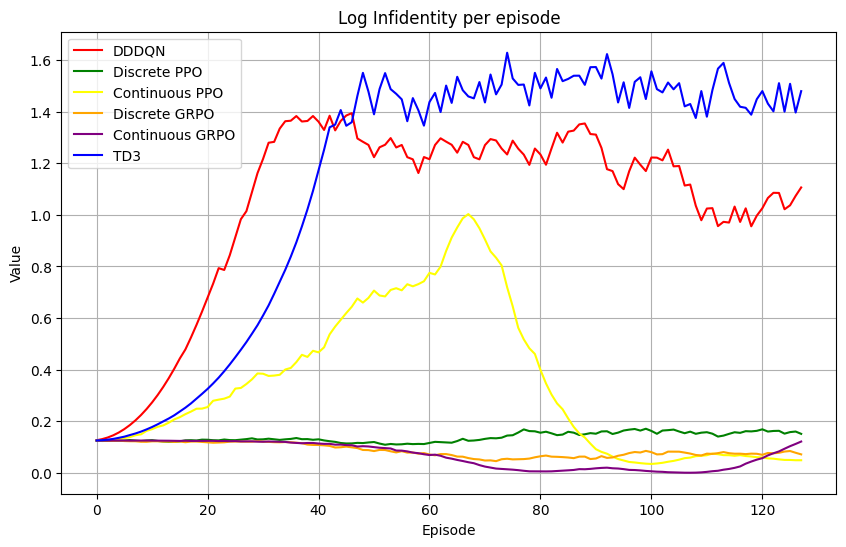

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(cnot_dddqn_ep["log_infidelity"], label="DDDQN", color="red")
plt.plot(cnot_ppo_d_ep["log_infidelity"], label="Discrete PPO", color="green")
plt.plot(cnot_ppo_c_ep["log_infidelity"], label="Continuous PPO", color="yellow")
plt.plot(cnot_grpo_d_ep["log_infidelity"], label="Discrete GRPO", color="orange")
plt.plot(cnot_grpo_c_ep["log_infidelity"], label="Continuous GRPO", color="purple")
plt.plot(cnot_td3_ep["log_infidelity"], label="TD3", color="blue")
plt.xlabel("Episode")
plt.ylabel("Value")
plt.title("Log Infidentity per episode")
plt.legend()
plt.grid()
plt.savefig("/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Log_Infidelity.png", dpi=300)
plt.show()

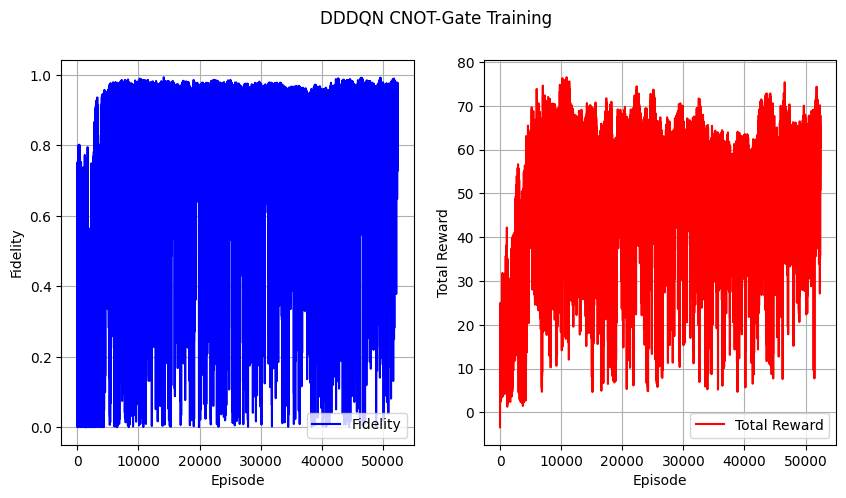

In [51]:
plt.figure(figsize=(10, 5))
plt.suptitle("DDDQN CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_dddqn["episode"], cnot_dddqn["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(cnot_dddqn["episode"], cnot_dddqn["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig("/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_DDDQN.png", dpi=300)
plt.show()

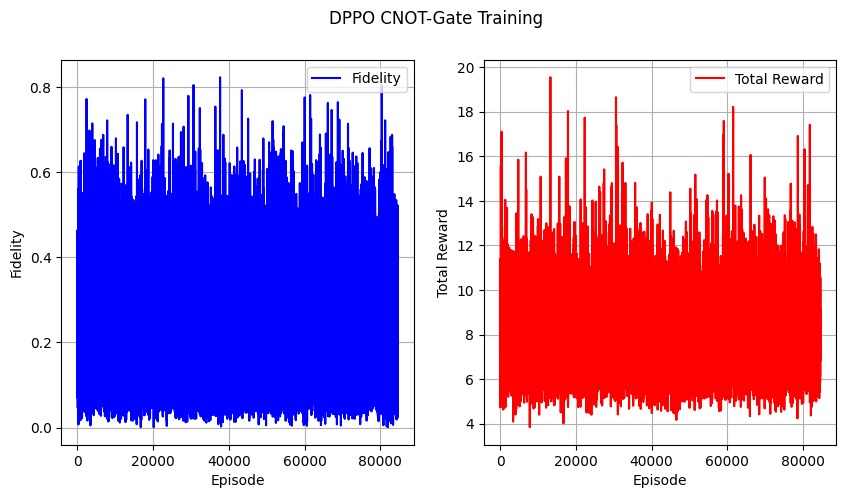

In [52]:
plt.figure(figsize=(10, 5))
plt.suptitle("DPPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_ppo_d["episode"], cnot_ppo_d["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(cnot_ppo_d["episode"], cnot_ppo_d["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_DPPO.png", dpi=300
)
plt.show()

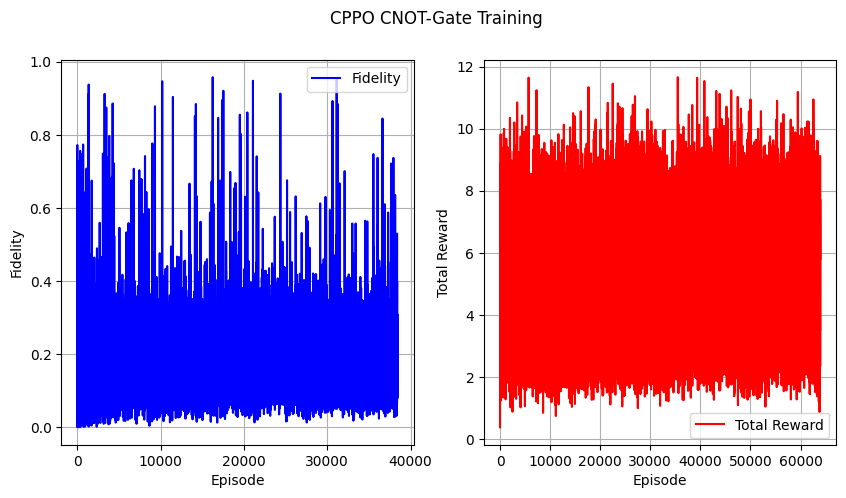

In [53]:
plt.figure(figsize=(10, 5))
plt.suptitle("CPPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_ppo_c["episode"], cnot_ppo_c["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_ppo_c["episode"], h_ppo_c["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_CPPO.png", dpi=300
)
plt.show()

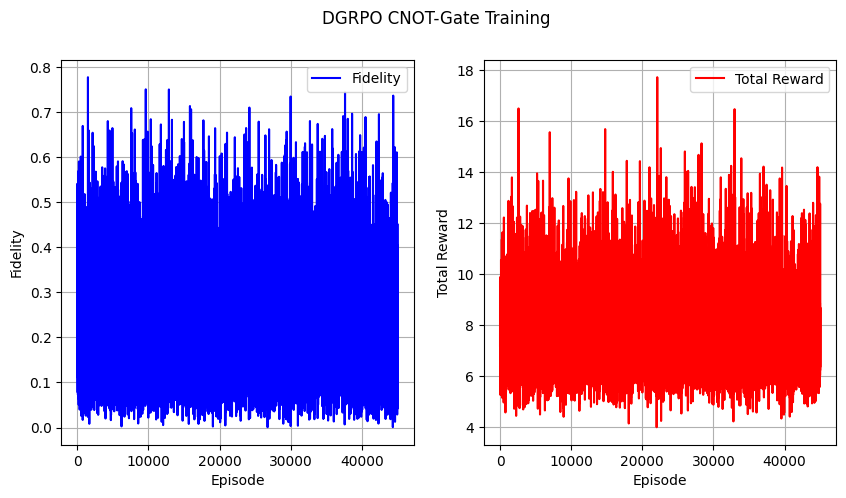

In [54]:
# for GRPO
plt.figure(figsize=(10, 5))
plt.suptitle("DGRPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_grpo_d["episode"], cnot_grpo_d["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(cnot_grpo_d["episode"], cnot_grpo_d["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")   
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_DGRPO.png", dpi=300
)
plt.show()

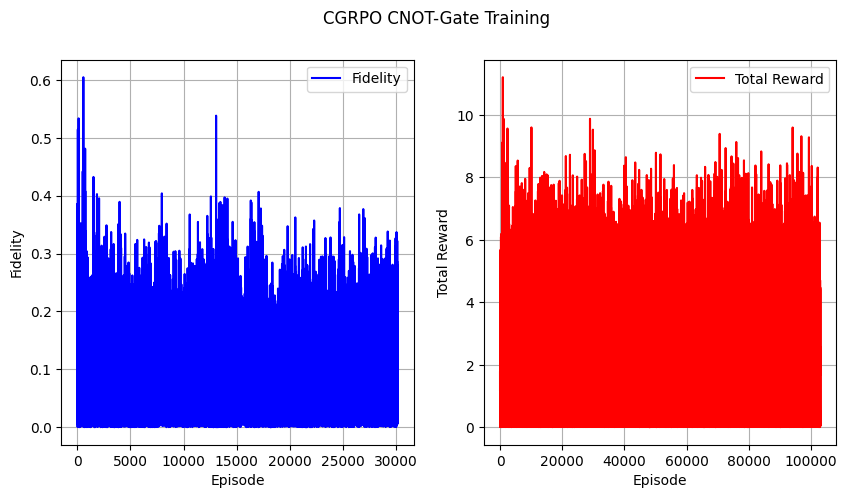

In [55]:
plt.figure(figsize=(10, 5))
plt.suptitle("CGRPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_grpo_c["episode"], cnot_grpo_c["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_grpo_c["episode"], h_grpo_c["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_CGRPO.png", dpi=300
)
plt.show()

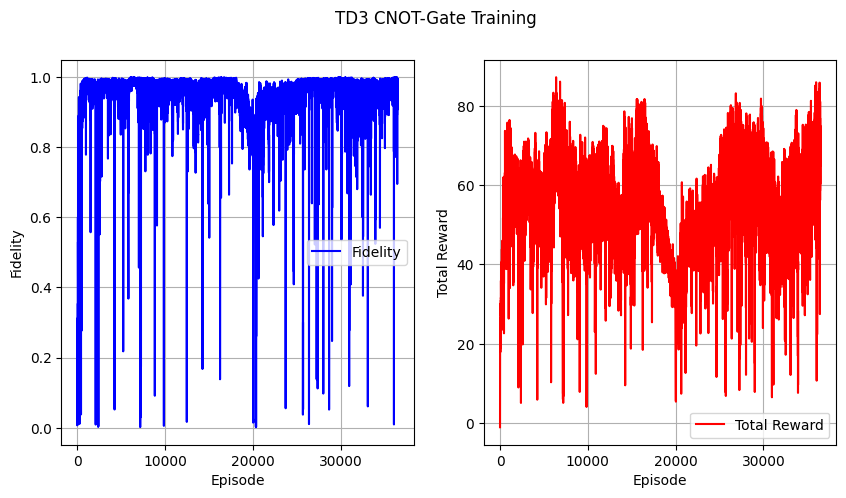

In [56]:
plt.figure(figsize=(10, 5))
plt.suptitle("TD3 CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_td3["episode"], cnot_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(cnot_td3["episode"], cnot_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()   
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_TD3.png", dpi=300
)
plt.show()

In [57]:
cnot_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "PPO-D", "PPO-C", "GRPO-D", "GRPO-C", "TD3"],
        "Max Fidelity": [
            cnot_dddqn["fidelity"].max(),
            cnot_ppo_d["fidelity"].max(),
            cnot_ppo_c["fidelity"].max(),
            cnot_grpo_d["fidelity"].max(),
            cnot_grpo_c["fidelity"].max(),
            cnot_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            cnot_dddqn["log_infidelity"].max(),
            cnot_ppo_d["log_infidelity"].max(),
            cnot_ppo_c["log_infidelity"].max(),
            cnot_grpo_d["log_infidelity"].max(),
            cnot_grpo_c["log_infidelity"].max(),
            cnot_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            cnot_dddqn["avg_fidelity"].max(),
            cnot_ppo_d["avg_fidelity"].max(),
            cnot_ppo_c["avg_fidelity"].max(),
            cnot_grpo_d["avg_fidelity"].max(),
            cnot_grpo_c["avg_fidelity"].max(),
            cnot_td3["avg_fidelity"].max(),
        ],
    }
)
cnot_max_sorted = cnot_max.sort_values(by="Max Log Infidelity", ascending=True)
cnot_max_sorted.to_latex(
    "/home/pdconte/Desktop/DUTh_Thesis/Tables/CNOT_Gate_Max_Values.tex"
)
cnot_max_sorted

Agent  Max Fidelity  Max Log Infidelity  Avg Fidelity
4  GRPO-C      0.604595            0.402958      0.683676
3  GRPO-D      0.777347            0.652371      0.821877
1   PPO-D      0.822801            0.751540      0.858241
2   PPO-C      0.957321            1.369790      0.965857
0   DDDQN      0.993770            2.205483      0.995016
5     TD3      0.999056            3.024841      0.999244

In [58]:
def plot_control_pulse_two_qubit(
    control_rabi,
    control_detuning,
    target_rabi,
    target_detuning,
    coupling_strength,
    gate,
    agent_type,
    smoothing_method="none",
    **kwargs,
):

    num_steps = len(control_rabi)
    assert (
        len(control_detuning) == num_steps
        and len(target_rabi) == num_steps
        and len(target_detuning) == num_steps
    ), "All control and target arrays must have the same length."

    # Handle coupling_strength: if scalar, convert to an array; if array, check length.
    if np.isscalar(coupling_strength):
        coupling_strength = np.full(num_steps, coupling_strength)
    else:
        assert (
            len(coupling_strength) == num_steps
        ), "Coupling strength array must have the same length as the qubit pulse arrays."

    t_normalized = np.linspace(0, 1, num_steps)

    # Normalize arrays
    control_rabi_normalized = _normalize_array(control_rabi, "Control Rabi")
    control_detuning_normalized = _normalize_array(control_detuning, "Control Detuning")
    target_rabi_normalized = _normalize_array(target_rabi, "Target Rabi")
    target_detuning_normalized = _normalize_array(target_detuning, "Target Detuning")
    coupling_strength_normalized = _normalize_array(
        coupling_strength, "Coupling Strength"
    )

    # Apply smoothing if requested
    if smoothing_method == "cubic_spline":
        control_rabi_normalized, t_normalized = _smooth_array(
            control_rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        control_detuning_normalized, t_normalized = _smooth_array(
            control_detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
        target_rabi_normalized, t_normalized = _smooth_array(
            target_rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        target_detuning_normalized, t_normalized = _smooth_array(
            target_detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
        coupling_strength_normalized, t_normalized = _smooth_array(
            coupling_strength_normalized, smoothing_method, t_normalized, **kwargs
        )
    else:
        control_rabi_normalized = _smooth_array(
            control_rabi_normalized, smoothing_method, **kwargs
        )
        control_detuning_normalized = _smooth_array(
            control_detuning_normalized, smoothing_method, **kwargs
        )
        target_rabi_normalized = _smooth_array(
            target_rabi_normalized, smoothing_method, **kwargs
        )
        target_detuning_normalized = _smooth_array(
            target_detuning_normalized, smoothing_method, **kwargs
        )
        coupling_strength_normalized = _smooth_array(
            coupling_strength_normalized, smoothing_method, **kwargs
        )

    # Create three subplots: one for control qubit, one for target qubit, and one for coupling strength
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # Plot for Control Qubit
    axs[0].plot(
        t_normalized,
        control_rabi_normalized,
        label=r"$\frac{\Omega_{c}}{\Omega_{c,\mathrm{max}}}$",
        color="blue",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[0].plot(
        t_normalized,
        control_detuning_normalized,
        label=r"$\frac{\Delta_{c}}{\Delta_{c,\mathrm{max}}}$",
        color="red",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[0].set_xlabel(r"$\frac{t}{T}$", fontsize=14)
    axs[0].set_ylabel("Normalized Pulses", fontsize=14)
    axs[0].set_title("Control Qubit Pulses", fontsize=16)
    axs[0].legend(fontsize=12)
    axs[0].grid(True)

    # Plot for Target Qubit
    axs[1].plot(
        t_normalized,
        target_rabi_normalized,
        label=r"$\frac{\Omega_{t}}{\Omega_{t,\mathrm{max}}}$",
        color="green",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[1].plot(
        t_normalized,
        target_detuning_normalized,
        label=r"$\frac{\Delta_{t}}{\Delta_{t,\mathrm{max}}}$",
        color="orange",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[1].set_xlabel(r"$\frac{t}{T}$", fontsize=14)
    axs[1].set_ylabel("Normalized Pulses", fontsize=14)
    axs[1].set_title("Target Qubit Pulses", fontsize=16)
    axs[1].legend(fontsize=12)
    axs[1].grid(True)

    # Plot for Coupling Strength
    axs[2].plot(
        t_normalized,
        coupling_strength_normalized,
        label=r"$\frac{J_{zx}}{J_{zx,\mathrm{max}}}$",
        color="purple",
        linestyle="-",
        drawstyle="steps-post",
    )
    axs[2].set_xlabel(r"$\frac{t}{T}$", fontsize=14)
    axs[2].set_ylabel("Normalized Coupling", fontsize=14)
    axs[2].set_title("Coupling Strength (Jzx)", fontsize=16)
    axs[2].legend(fontsize=12)
    axs[2].grid(True)

    # Overall title including coupling strength information
    fig.suptitle(
        f"{agent_type} {gate} Gate Control Pulses",
        fontsize=18,
    )
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(
        f"/home/pdconte/Desktop/DUTh_Thesis/Plots/{gate}_Gate_Control_{agent_type}.png",
        dpi=300,
    )
    plt.show()

In [59]:
# Apply the function to the column
cnot_dddqn_ep["control_pulse_params"] = cnot_dddqn_ep["control_pulse_params"].apply(
    clean_and_convert
)

cnot_dddqn_ep["omega1"] = cnot_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("omega1") if isinstance(x, dict) else None
)
cnot_dddqn_ep["delta1"] = cnot_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("delta1") if isinstance(x, dict) else None
)

cnot_dddqn_ep["omega2"] = cnot_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("omega2") if isinstance(x, dict) else None
)
cnot_dddqn_ep["delta2"] = cnot_dddqn_ep["control_pulse_params"].apply(
    lambda x: x.get("delta2") if isinstance(x, dict) else None
)

cnot_dddqn_ep['coupling_strength'] = cnot_dddqn_ep['control_pulse_params'].apply(
    lambda x: x.get('coupling_strength_zx') if isinstance(x, dict) else None
    )

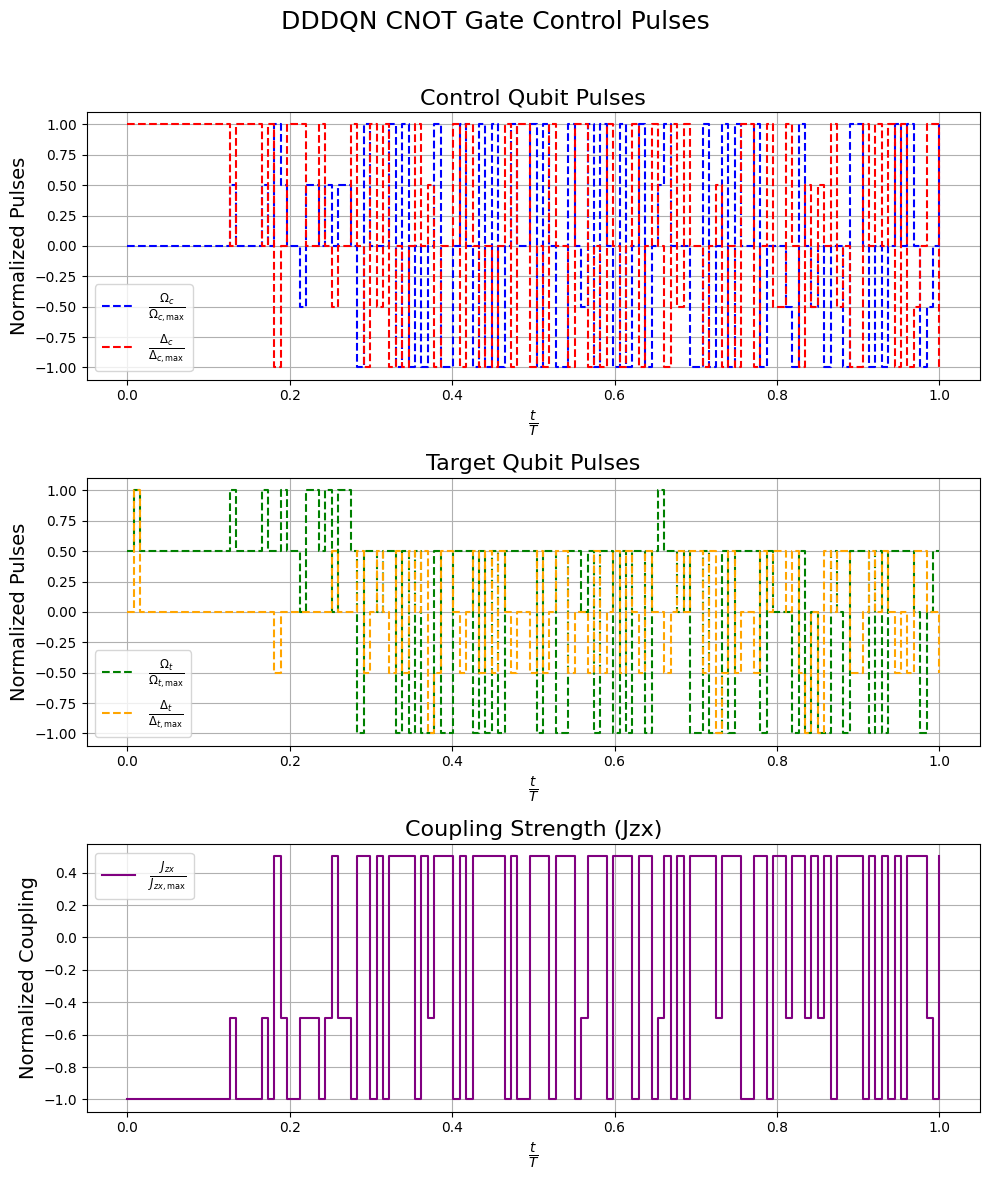

In [60]:
plot_control_pulse_two_qubit(
    cnot_dddqn_ep["omega1"],
    cnot_dddqn_ep["delta1"],
    cnot_dddqn_ep["omega2"],
    cnot_dddqn_ep["delta2"],
    cnot_dddqn_ep['coupling_strength'],
    "CNOT",
    "DDDQN",
    smoothing_method="none",
)

In [61]:
# Apply the function to the column
cnot_ppo_d_ep["control_pulse_params"] = cnot_ppo_d_ep["control_pulse_params"].apply(
    clean_and_convert
)

cnot_ppo_d_ep["omega1"] = cnot_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega1") if isinstance(x, dict) else None
)
cnot_ppo_d_ep["delta1"] = cnot_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta1") if isinstance(x, dict) else None
)

cnot_ppo_d_ep["omega2"] = cnot_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega2") if isinstance(x, dict) else None
)
cnot_ppo_d_ep["delta2"] = cnot_ppo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta2") if isinstance(x, dict) else None
)

cnot_ppo_d_ep['coupling_strength'] = cnot_ppo_d_ep['control_pulse_params'].apply(
    lambda x: x.get('coupling_strength') if isinstance(x, dict) else None
    )

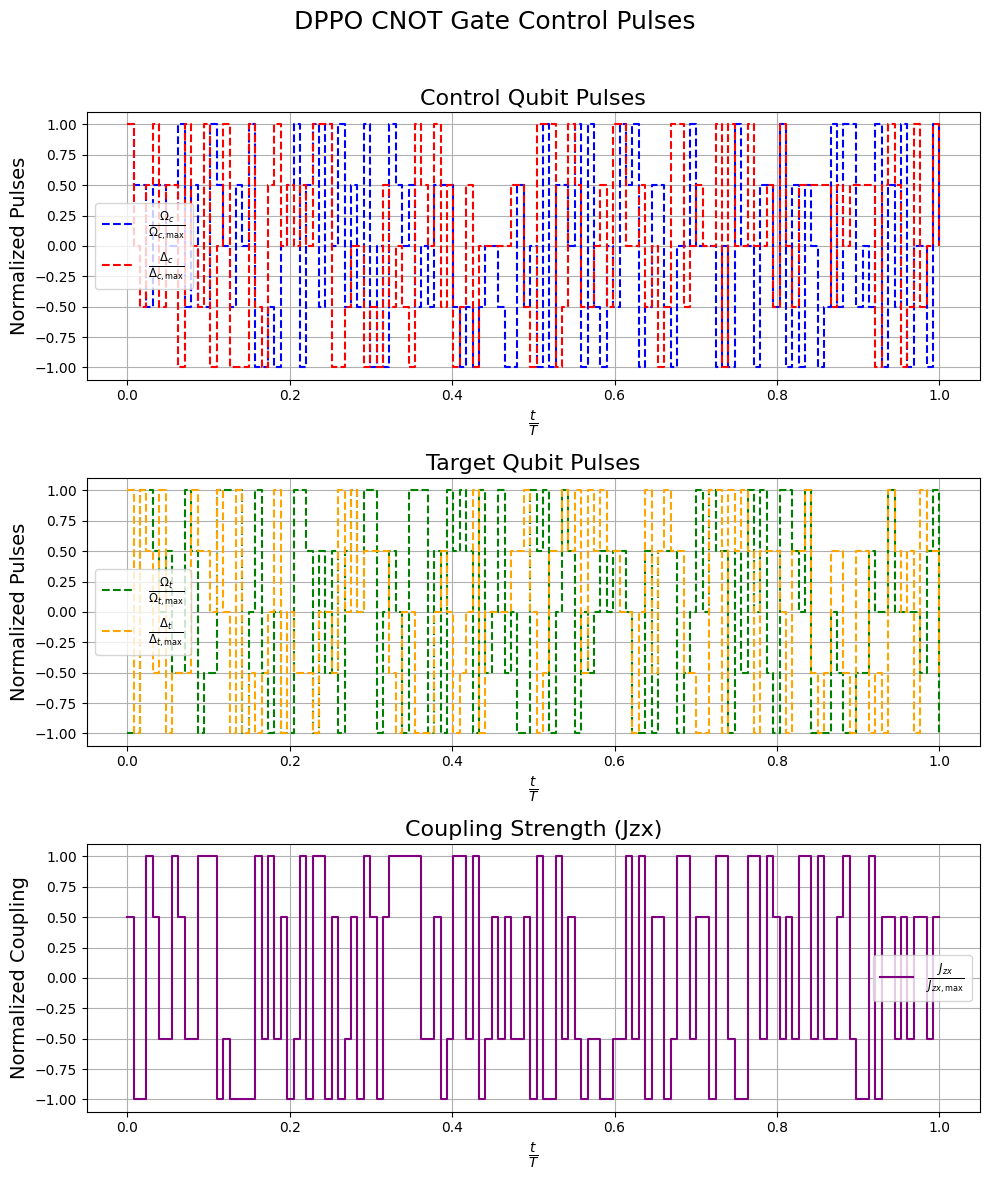

In [62]:
plot_control_pulse_two_qubit(
    cnot_ppo_d_ep["omega1"],
    cnot_ppo_d_ep["delta1"],
    cnot_ppo_d_ep["omega2"],
    cnot_ppo_d_ep["delta2"],
    cnot_ppo_d_ep["coupling_strength"],
    "CNOT",
    "DPPO",
    smoothing_method="none",
)

In [63]:
# Apply the function to the column
cnot_ppo_c_ep["control_pulse_params"] = cnot_ppo_c_ep["control_pulse_params"].apply(
    clean_and_convert
)

cnot_ppo_c_ep["omega1"] = cnot_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega1") if isinstance(x, dict) else None
)
cnot_ppo_c_ep["delta1"] = cnot_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta1") if isinstance(x, dict) else None
)

cnot_ppo_c_ep["omega2"] = cnot_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega2") if isinstance(x, dict) else None
)
cnot_ppo_c_ep["delta2"] = cnot_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta2") if isinstance(x, dict) else None
)

cnot_ppo_c_ep["coupling_strength"] = cnot_ppo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("coupling_strength") if isinstance(x, dict) else None
)

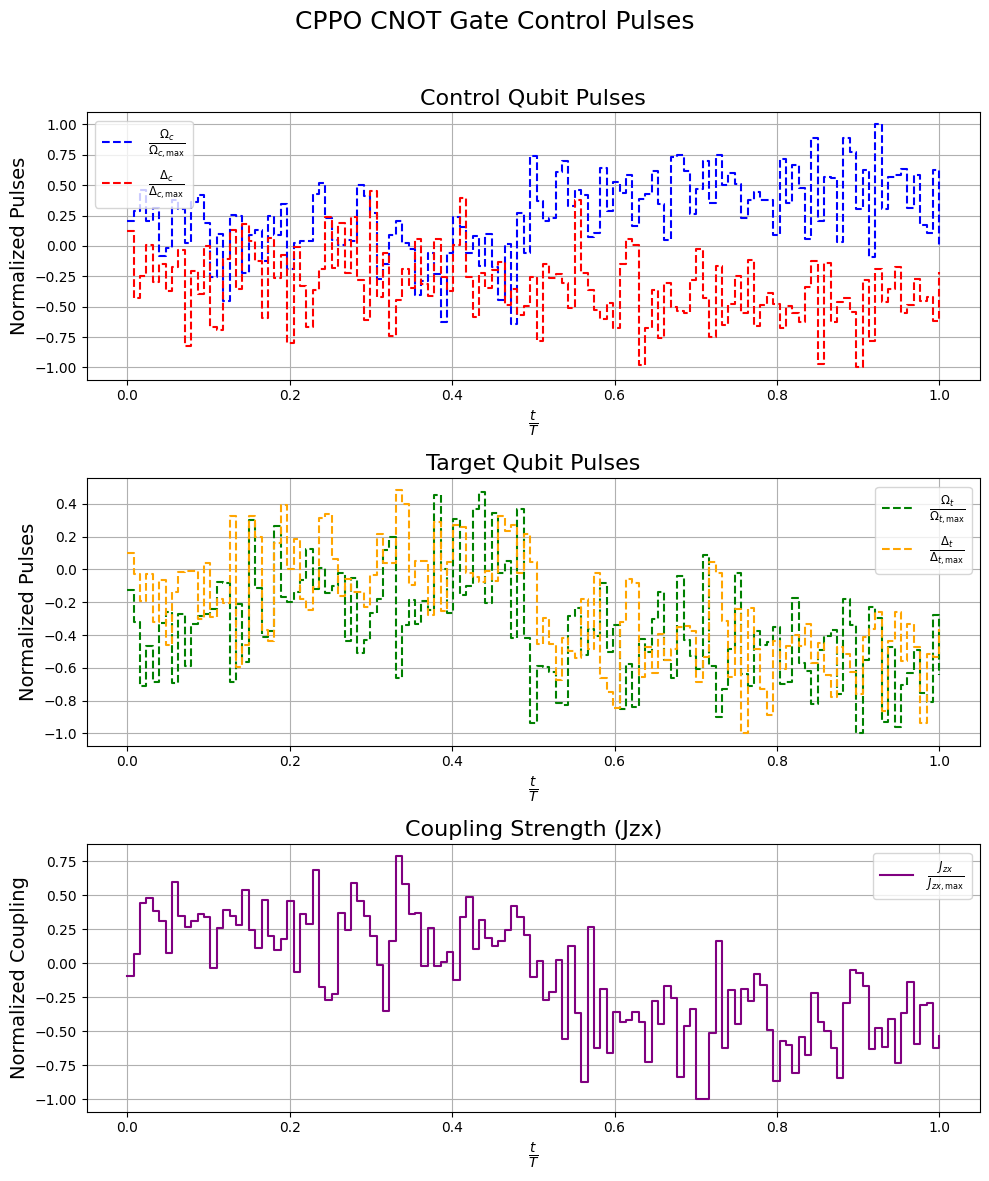

In [64]:
plot_control_pulse_two_qubit(
    cnot_ppo_c_ep["omega1"],
    cnot_ppo_c_ep["delta1"],
    cnot_ppo_c_ep["omega2"],
    cnot_ppo_c_ep["delta2"],
    cnot_ppo_c_ep["coupling_strength"],
    "CNOT",
    "CPPO",
    smoothing_method="none",
)

In [65]:
# Apply the function to the column
cnot_grpo_d_ep["control_pulse_params"] = cnot_grpo_d_ep["control_pulse_params"].apply(
    clean_and_convert
)

cnot_grpo_d_ep["omega1"] = cnot_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega1") if isinstance(x, dict) else None
)
cnot_grpo_d_ep["delta1"] = cnot_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta1") if isinstance(x, dict) else None
)

cnot_grpo_d_ep["omega2"] = cnot_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("omega2") if isinstance(x, dict) else None
)
cnot_grpo_d_ep["delta2"] = cnot_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("delta2") if isinstance(x, dict) else None
)

cnot_grpo_d_ep["coupling_strength"] = cnot_grpo_d_ep["control_pulse_params"].apply(
    lambda x: x.get("coupling_strength") if isinstance(x, dict) else None
)

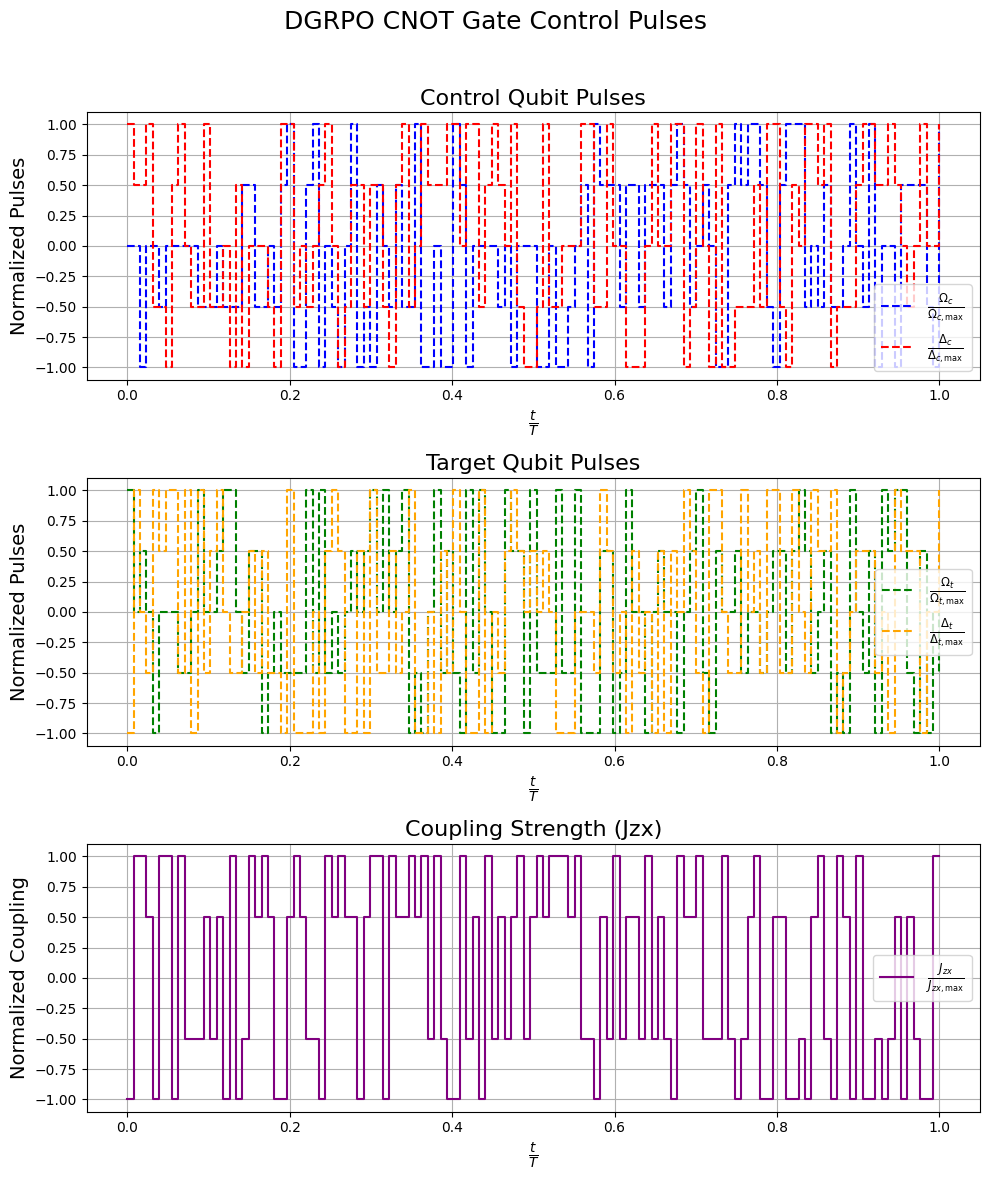

In [66]:
plot_control_pulse_two_qubit(
    cnot_grpo_d_ep["omega1"],
    cnot_grpo_d_ep["delta1"],
    cnot_grpo_d_ep["omega2"],
    cnot_grpo_d_ep["delta2"],
    cnot_grpo_d_ep["coupling_strength"],
    "CNOT",
    "DGRPO",
    smoothing_method="none",
)

In [67]:
# Apply the function to the column
cnot_grpo_c_ep["control_pulse_params"] = cnot_grpo_c_ep["control_pulse_params"].apply(
    clean_and_convert
)

cnot_grpo_c_ep["omega1"] = cnot_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega1") if isinstance(x, dict) else None
)
cnot_grpo_c_ep["delta1"] = cnot_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta1") if isinstance(x, dict) else None
)

cnot_grpo_c_ep["omega2"] = cnot_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("omega2") if isinstance(x, dict) else None
)
cnot_grpo_c_ep["delta2"] = cnot_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("delta2") if isinstance(x, dict) else None
)

cnot_grpo_c_ep["coupling_strength"] = cnot_grpo_c_ep["control_pulse_params"].apply(
    lambda x: x.get("coupling_strength_zx") if isinstance(x, dict) else None
)

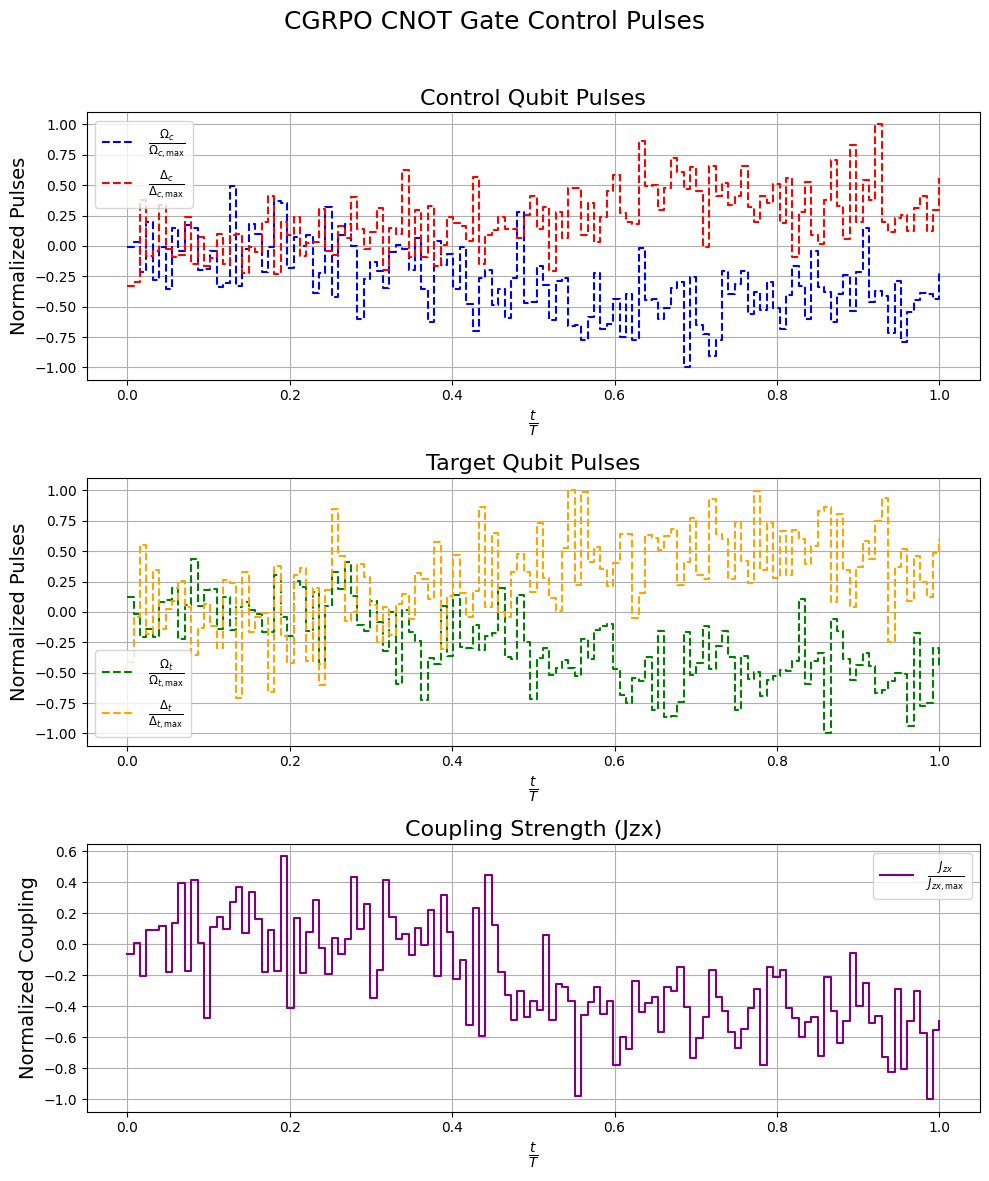

In [68]:
plot_control_pulse_two_qubit(
    cnot_grpo_c_ep["omega1"],
    cnot_grpo_c_ep["delta1"],
    cnot_grpo_c_ep["omega2"],
    cnot_grpo_c_ep["delta2"],
    cnot_grpo_c_ep["coupling_strength"],
    "CNOT",
    "CGRPO",
    smoothing_method="none",
)

In [69]:
# Apply the function to the column
cnot_td3_ep["control_pulse_params"] = cnot_td3_ep["control_pulse_params"].apply(
    clean_and_convert
)

cnot_td3_ep["omega1"] = cnot_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("omega1") if isinstance(x, dict) else None
)
cnot_td3_ep["delta1"] = cnot_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("delta1") if isinstance(x, dict) else None
)

cnot_td3_ep["omega2"] = cnot_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("omega2") if isinstance(x, dict) else None
)
cnot_td3_ep["delta2"] = cnot_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("delta2") if isinstance(x, dict) else None
)

cnot_td3_ep["coupling_strength"] = cnot_td3_ep["control_pulse_params"].apply(
    lambda x: x.get("coupling_strength") if isinstance(x, dict) else None
)

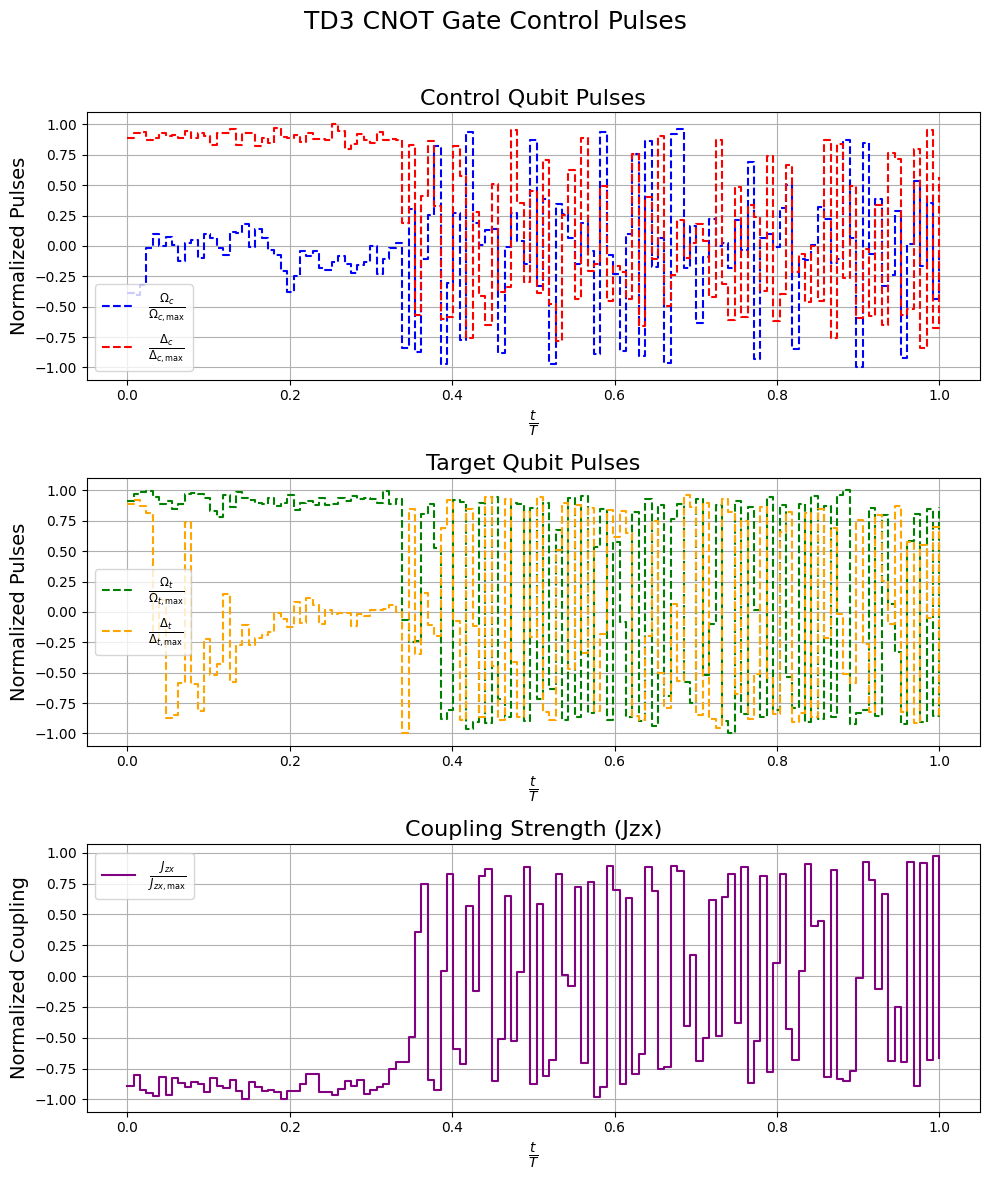

In [70]:
plot_control_pulse_two_qubit(
    cnot_td3_ep["omega1"],
    cnot_td3_ep["delta1"],
    cnot_td3_ep["omega2"],
    cnot_td3_ep["delta2"],
    cnot_td3_ep["coupling_strength"],
    "CNOT",
    "TD3",
    smoothing_method="none",
)

In [71]:
# import from ./Data/ the crab and grape methods for the gates

h_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_h_adam.csv')
h_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_h_lbfgs.csv')
h_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_h.csv')

t_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_t_adam.csv')
t_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_t_lbfgs.csv')
t_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_t.csv')

cnot_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_cnot_adam.csv')
cnot_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_cnot_lbfgs.csv')
cnot_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_cnot.csv')

In [72]:
h_grape_adam.isin([-np.inf]).sum()

Unnamed: 0           0
loss_grape_h_adam    0
fid_grape_h_adam     0
inf_grape_h_adam     0
dtype: int64

In [73]:
h_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0             0
loss_grape_h_lbfgs     0
fid_grape_h_lbfgs      0
inf_grape_h_lbfgs     63
dtype: int64

In [74]:
h_grape_lbfgs.replace([-np.inf], np.nan, inplace=True)
h_grape_lbfgs.ffill(inplace=True)

In [75]:
h_crab.isin([-np.inf]).sum()

Unnamed: 0       0
loss_crab_h      0
fid_crab_h       0
inf_crab_h     165
dtype: int64

In [76]:
h_crab.replace([-np.inf], np.nan, inplace=True)
h_crab.ffill(inplace=True)

In [77]:
h_grape_adam["inf_grape_h_adam_100"] = h_grape_adam["inf_grape_h_adam"].rolling(100).mean()
h_grape_lbfgs["inf_grape_h_lbfgs_100"] = h_grape_lbfgs["inf_grape_h_lbfgs"].rolling(100).mean()
h_crab["inf_crab_h_100"] = h_crab["inf_crab_h"].rolling(100).mean()

In [78]:
h_grape_adam["inf_grape_h_adam_100"] = h_grape_adam["inf_grape_h_adam_100"].fillna(0)
h_grape_lbfgs["inf_grape_h_lbfgs_100"] = h_grape_lbfgs["inf_grape_h_lbfgs_100"].fillna(
    0
)
h_crab["inf_crab_h_100"] = h_crab["inf_crab_h_100"].fillna(0)

In [79]:
h_grape_adam.rename(
    columns={"inf_grape_h_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
h_grape_lbfgs.rename(
    columns={"inf_grape_h_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
h_crab.rename(
    columns={"inf_crab_h_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)

In [80]:
h_grape_adam["log_infidelity_100"] = -h_grape_adam["log_infidelity_100"]
h_grape_lbfgs["log_infidelity_100"] = -h_grape_lbfgs["log_infidelity_100"]
h_crab["log_infidelity_100"] = -h_crab["log_infidelity_100"]

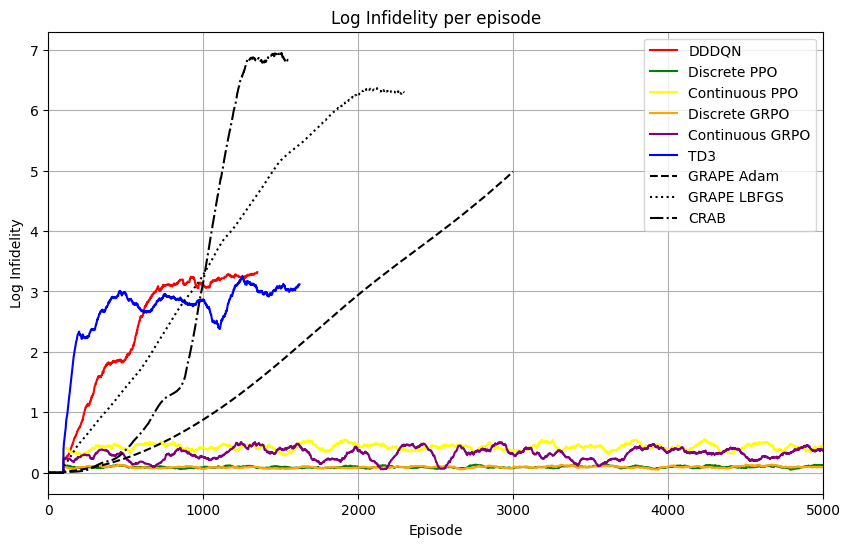

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(h_dddqn["episode"], h_dddqn["log_infidelity_100"], label="DDDQN", color="red")
plt.plot(
    h_ppo_d["episode"],
    h_ppo_d["log_infidelity_100"],
    label="Discrete PPO",
    color="green",
)
plt.plot(
    h_ppo_c["episode"],
    h_ppo_c["log_infidelity_100"],
    label="Continuous PPO",
    color="yellow",
)
plt.plot(
    h_grpo_d["episode"],
    h_grpo_d["log_infidelity_100"],
    label="Discrete GRPO",
    color="orange",
)
plt.plot(
    h_grpo_c["episode"],
    h_grpo_c["log_infidelity_100"],
    label="Continuous GRPO",
    color="purple",
)
plt.plot(
    h_td3["episode"], 
    h_td3["log_infidelity_100"], 
    label="TD3", 
    color="blue"
)
plt.plot(
    h_grape_adam["episode"],
    h_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    h_grape_lbfgs["episode"],
    h_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    h_crab["episode"],
    h_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)
plt.xlabel("Episode")
plt.xlim(0, 5000)
plt.ylabel("Log Infidelity")
plt.title("Log Infidelity per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Log_Infidelity_Comparison.png",
    dpi=300,
)
plt.show()

In [82]:
t_grape_adam.isin([-np.inf]).sum()

Unnamed: 0             0
loss_grape_t_adam      0
fid_grape_t_adam       0
inf_grape_t_adam     355
dtype: int64

In [83]:
t_grape_adam.replace([-np.inf], np.nan, inplace=True)
t_grape_adam.ffill(inplace=True)

In [84]:
t_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0            0
loss_grape_t_lbfgs    0
fid_grape_t_lbfgs     0
inf_grape_t_lbfgs     0
dtype: int64

In [85]:
t_crab.isin([-np.inf]).sum()

Unnamed: 0       0
loss_crab_t      0
fid_crab_t       0
inf_crab_t     113
dtype: int64

In [86]:
t_crab.replace([-np.inf], np.nan, inplace=True)
t_crab.ffill(inplace=True)

In [87]:
t_grape_adam["inf_grape_t_adam_100"] = t_grape_adam["inf_grape_t_adam"].rolling(100).mean()
t_grape_lbfgs["inf_grape_t_lbfgs_100"] = t_grape_lbfgs["inf_grape_t_lbfgs"].rolling(100).mean()
t_crab["inf_crab_t_100"] = t_crab["inf_crab_t"].rolling(100).mean()

In [88]:
t_grape_adam["inf_grape_t_adam_100"] = t_grape_adam["inf_grape_t_adam_100"].fillna(0)
t_grape_lbfgs["inf_grape_t_lbfgs_100"] = t_grape_lbfgs["inf_grape_t_lbfgs_100"].fillna(
    0
)
t_crab["inf_crab_t_100"] = t_crab["inf_crab_t_100"].fillna(0)

In [89]:
t_grape_adam.rename(
    columns={"inf_grape_t_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
t_grape_lbfgs.rename(
    columns={"inf_grape_t_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
t_crab.rename(
    columns={"inf_crab_t_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)


In [90]:
t_grape_adam["log_infidelity_100"] = -t_grape_adam["log_infidelity_100"]
t_grape_lbfgs["log_infidelity_100"] = -t_grape_lbfgs["log_infidelity_100"]
t_crab["log_infidelity_100"] = -t_crab["log_infidelity_100"]

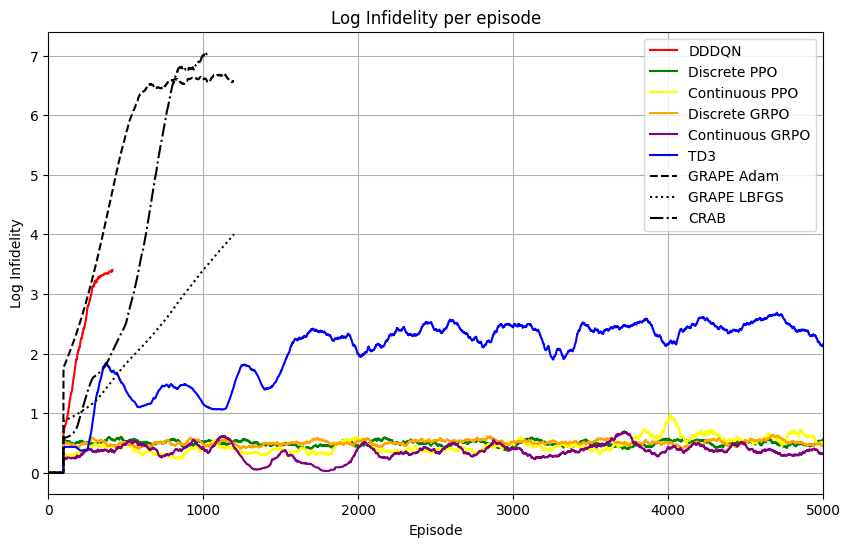

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(t_dddqn["episode"], t_dddqn["log_infidelity_100"], label="DDDQN", color="red")
plt.plot(
    t_ppo_d["episode"],
    t_ppo_d["log_infidelity_100"],
    label="Discrete PPO",
    color="GREEN",
)
plt.plot(
    t_ppo_c["episode"],
    t_ppo_c["log_infidelity_100"],
    label="Continuous PPO",
    color="YELLOW",
)
plt.plot(
    t_grpo_d["episode"],
    t_grpo_d["log_infidelity_100"],
    label="Discrete GRPO",
    color="ORANGE",
)
plt.plot(
    t_grpo_c["episode"],
    t_grpo_c["log_infidelity_100"],
    label="Continuous GRPO",
    color="PURPLE",
)
plt.plot(t_td3["episode"], t_td3["log_infidelity_100"], label="TD3", color="blue")
plt.plot(t_grape_adam["episode"], t_grape_adam["log_infidelity_100"], label="GRAPE Adam", color="black", linestyle="dashed")
plt.plot(t_grape_lbfgs["episode"], t_grape_lbfgs["log_infidelity_100"], label="GRAPE LBFGS", color="black", linestyle="dotted")
plt.plot(t_crab["episode"], t_crab["log_infidelity_100"], label="CRAB",
    color="black",
    linestyle="dashdot",
)

plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.xlim(0, 5000)
plt.title("Log Infidelity per episode")
plt.legend()
plt.grid()
plt.savefig("/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Log_Infidelity_Comparison.png", dpi=300)
plt.show()

In [92]:
cnot_grape_adam.isin([-np.inf]).sum()

Unnamed: 0              0
loss_grape_cnot_adam    0
fid_grape_cnot_adam     0
inf_grape_cnot_adam     0
dtype: int64

In [93]:
cnot_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0               0
loss_grape_cnot_lbfgs    0
fid_grape_cnot_lbfgs     0
inf_grape_cnot_lbfgs     0
dtype: int64

In [94]:
cnot_crab.isin([-np.inf]).sum()

Unnamed: 0          0
loss_crab_cnot      0
fid_crab_cnot       0
inf_crab_cnot     425
dtype: int64

In [95]:
cnot_crab.replace([-np.inf], np.nan, inplace=True)
cnot_crab.ffill(inplace=True)

In [96]:
cnot_grape_adam["inf_grape_cnot_adam_100"] = (
    cnot_grape_adam["inf_grape_cnot_adam"].rolling(100).mean()
)
cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"] = (
    cnot_grape_lbfgs["inf_grape_cnot_lbfgs"].rolling(100).mean()
)
cnot_crab["inf_crab_cnot_100"] = cnot_crab["inf_crab_cnot"].rolling(100).mean()

In [97]:
cnot_grape_adam["inf_grape_cnot_adam_100"] = cnot_grape_adam["inf_grape_cnot_adam_100"].fillna(0)
cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"] = cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"].fillna(
    0
)
cnot_crab["inf_crab_cnot_100"] = cnot_crab["inf_crab_cnot_100"].fillna(0)

In [98]:
cnot_grape_adam.rename(
    columns={"inf_grape_cnot_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
cnot_grape_lbfgs.rename(
    columns={"inf_grape_cnot_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
cnot_crab.rename(
    columns={"inf_crab_cnot_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)

In [99]:
cnot_grape_adam["log_infidelity_100"] = -cnot_grape_adam["log_infidelity_100"]
cnot_grape_lbfgs["log_infidelity_100"] = -cnot_grape_lbfgs["log_infidelity_100"]
cnot_crab["log_infidelity_100"] = -cnot_crab["log_infidelity_100"]

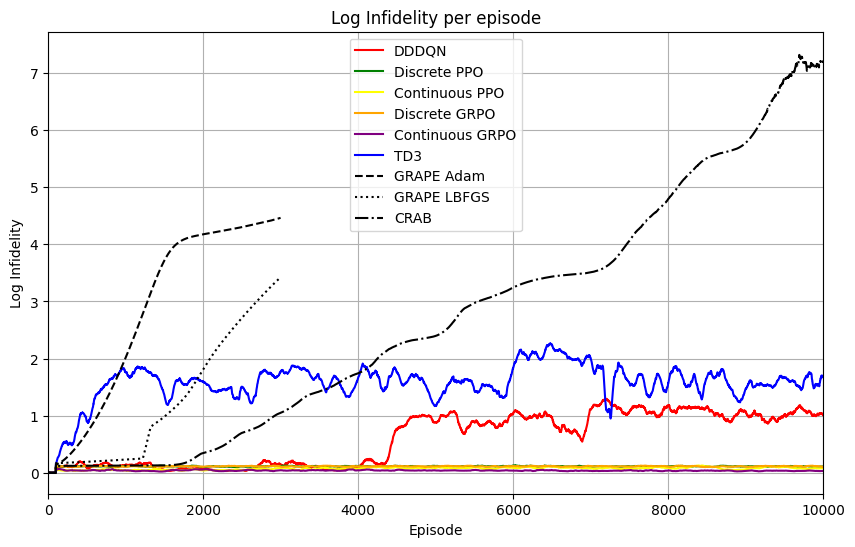

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(
    cnot_dddqn["episode"], cnot_dddqn["log_infidelity_100"], label="DDDQN", color="red"
)
plt.plot(
    cnot_ppo_d["episode"],
    cnot_ppo_d["log_infidelity_100"],
    label="Discrete PPO",
    color="GREEN",
)
plt.plot(
    cnot_ppo_c["episode"],
    cnot_ppo_c["log_infidelity_100"],
    label="Continuous PPO",
    color="YELLOW",
)
plt.plot(
    cnot_grpo_d["episode"],
    cnot_grpo_d["log_infidelity_100"],
    label="Discrete GRPO",
    color="ORANGE",
)
plt.plot(
    cnot_grpo_c["episode"],
    cnot_grpo_c["log_infidelity_100"],
    label="Continuous GRPO",
    color="PURPLE",
)
plt.plot(cnot_td3["episode"], cnot_td3["log_infidelity_100"], label="TD3", color="BLUE")
plt.plot(
    cnot_grape_adam["episode"],
    cnot_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    cnot_grape_lbfgs["episode"],
    cnot_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    cnot_crab["episode"],
    cnot_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)

plt.xlabel("Episode")
plt.xlim(0, 10000)
plt.ylabel("Log Infidelity")
plt.title("Log Infidelity per episode")
plt.legend()
plt.grid()
plt.savefig("/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Log_Infidelity_Comparison.png", dpi=300)
plt.show()